# Title

## 1 Introduction
- text
- image(?)

## 2 Preliminary Results

In [2]:
# import library
library(tidyverse)
library(cowplot)
library(infer)

options(repr.plot.width = 20, repr.plot.height = 10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### 2.1 Reading the dataset from web

In [3]:
cancer <- read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')

Rows: 116 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): Age, BMI, Glucose, Insulin, HOMA, Leptin, Adiponectin, Resistin, M...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
head(cancer)

Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
48,23.50000,70,2.707,0.4674087,8.8071,9.702400,7.99585,417.114,1
83,20.69049,92,3.115,0.7068973,8.8438,5.429285,4.06405,468.786,1
82,23.12467,91,4.498,1.0096511,17.9393,22.432040,9.27715,554.697,1
68,21.36752,77,3.226,0.6127249,9.8827,7.169560,12.76600,928.220,1
86,21.11111,92,3.549,0.8053864,6.6994,4.819240,10.57635,773.920,1
49,22.85446,92,3.226,0.7320869,6.8317,13.679750,10.31760,530.410,1


**Table 2.1** Breast cancer dataset with columns `Age` ($years$), `BMI` ($kg/m^{2}$), `Glucose` ($mg/dL$), `Insulin` ($\mu U/mL$), `HOMA` (Homeostatic Model Assessment), `Leptin` ($ng/mL$), `Adiponectin` ($\mu g/mL$), `Resistin` ($ng/mL$), `MCP-1` (Monocyte Chemoattractant Protein-1 in $pg/dL$), and `Classification` (1 = Healthy controls, 2 = Patients)

### 2.2 Wrangling the data
We are interested in comparing the insulin and MCP.1 levels of the healthy controls and the patients, so we split `cancer` into `control` (`Classification` == 1), and `patient` (`Classification` == 2), then select `Insulin`, and `MCP.1`.

In [5]:
control <- cancer %>%
    filter(Classification == 1) %>%
    select(Insulin, MCP.1)

patient <- cancer %>%
    filter(Classification == 2) %>%
    select(Insulin, MCP.1)

### 2.3 Explantory data analysis
We perform an explanatory data analysis on the datasets to investigate and to better understand the data.

In [19]:
control_summarize <- control %>%
    summarize(Insulin_min = min(Insulin),
              Insulin_max = max(Insulin),
              Insulin_mean = mean(Insulin),
              Insulin_median = median(Insulin),
              Insulin_sd = sd(Insulin),
              MCP.1_min = min(MCP.1),
              MCP.1_max = max(MCP.1),
              MCP.1_mean = mean(MCP.1),
              MCP.1_median = median(MCP.1),
              MCP.1_sd = sd(MCP.1))

In [20]:
control_summarize

Insulin_min,Insulin_max,Insulin_mean,Insulin_median,Insulin_sd,MCP.1_min,MCP.1_max,MCP.1_mean,MCP.1_median,MCP.1_sd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.707,26.211,6.933769,5.4835,4.859793,45.843,1256.083,499.7307,471.3225,292.2422


**Table 2.2** Range, mean, median and standard deviation of `control` dataset

In [21]:
patient_summarize <- patient %>%
    summarize(Insulin_min = min(Insulin),
              Insulin_max = max(Insulin),
              Insulin_mean = mean(Insulin),
              Insulin_median = median(Insulin),
              Insulin_sd = sd(Insulin),
              MCP.1_min = min(MCP.1),
              MCP.1_max = max(MCP.1),
              MCP.1_mean = mean(MCP.1),
              MCP.1_median = median(MCP.1),
              MCP.1_sd = sd(MCP.1))

In [22]:
patient_summarize

Insulin_min,Insulin_max,Insulin_mean,Insulin_median,Insulin_sd,MCP.1_min,MCP.1_max,MCP.1_mean,MCP.1_median,MCP.1_sd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.432,58.46,12.51322,7.58,12.31774,90.09,1698.44,563.0165,465.374,384.0016


**Table 2.3** Range, mean, median and standard deviation of `patient` dataset

|          | Minimum | Maximum |  Mean  |  Median  | Standard Deviation |
|:--------:|:-------:|:-------:|:------:|:--------:|:------------------:|
| Healthy Controls |  2.707  |  26.211 |  6.934 |  5.484 |        4.860       |
|     Patients     |  2.432  |  58.46  | 12.513 |  7.58  |       12.318       |

**Table 2.4** Summary of insulin levels of healthy controls and patients

|          | Minimum | Maximum |  Mean  |  Median  | Standard Deviation |
|:--------:|:-------:|:-------:|:------:|:--------:|:------------------:|
| Healthy Controls |  45.843 | 1256.083 | 499.731 | 471.323 |       292.242      |
|     Patients     |  90.09  |  1698.44 | 563.017 | 465.374 |       384.002      |

**Table 2.4** Summary of MCP.1 levels of healthy controls and patients

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


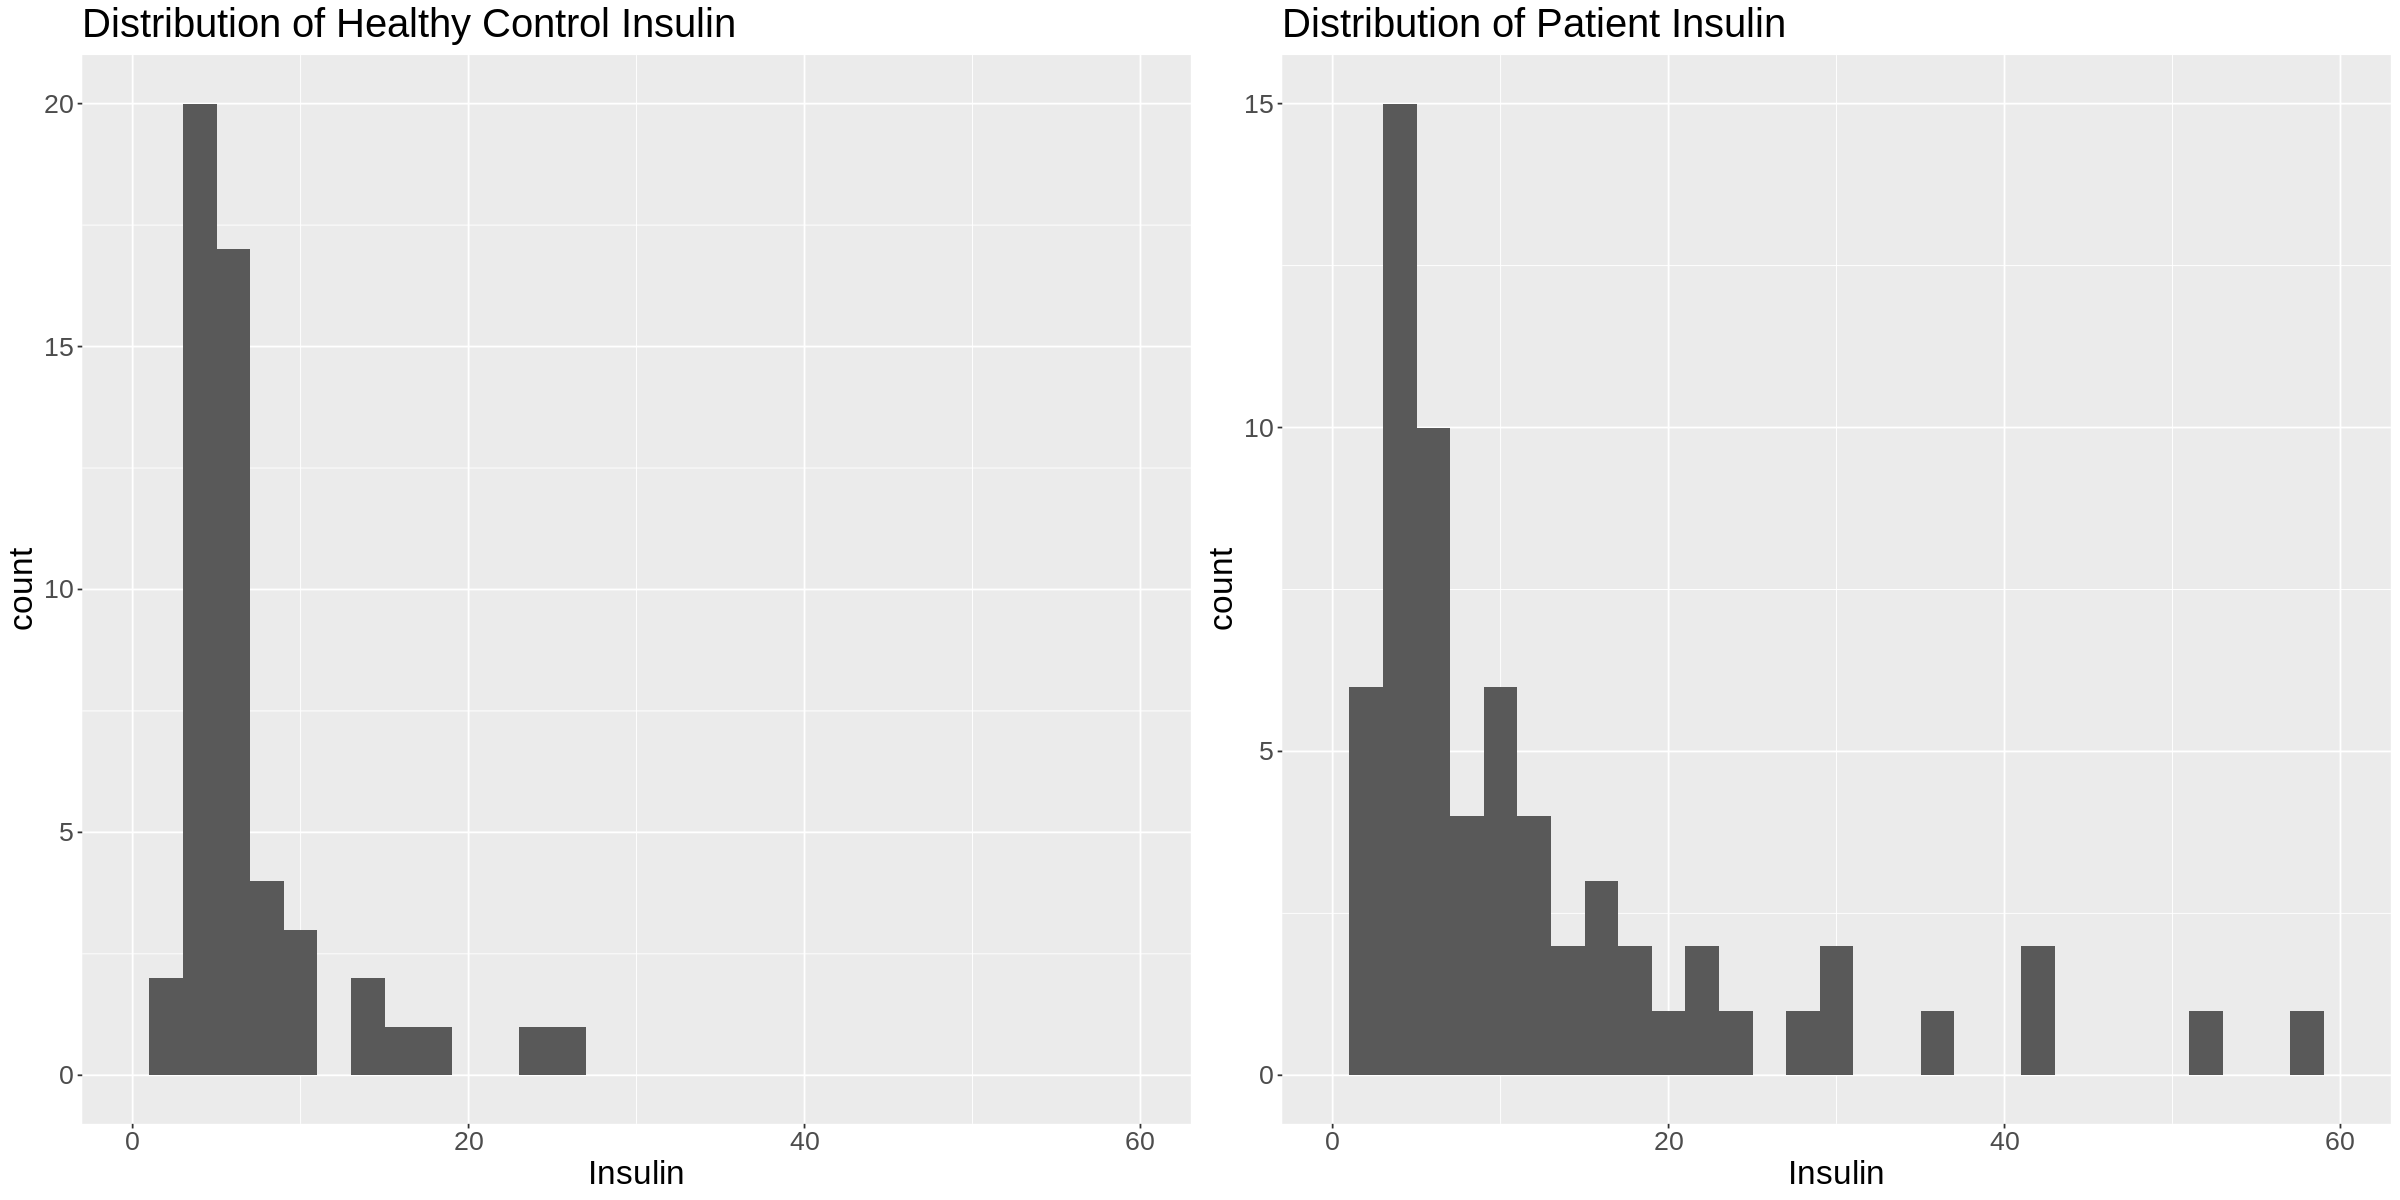

In [50]:
control_insulin_plot <- control %>%
    ggplot(aes(x = Insulin)) +
    geom_histogram(binwidth = 2) + 
    labs(x = "Insulin", title = paste('Distribution of Healthy Control Insulin')) +
    theme(text = element_text(size=20)) +
    xlim(0, 60)

patient_insulin_plot <- patient %>%
    ggplot(aes(x = Insulin)) +
    geom_histogram(binwidth = 2) + 
    labs(x = "Insulin", title = paste('Distribution of Patient Insulin')) +
    theme(text = element_text(size=20)) +
    xlim(0, 60)

plot_grid(control_insulin_plot, patient_insulin_plot)

**Figure 2.1** Healthy controls v.s. patients with respect to insulin

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


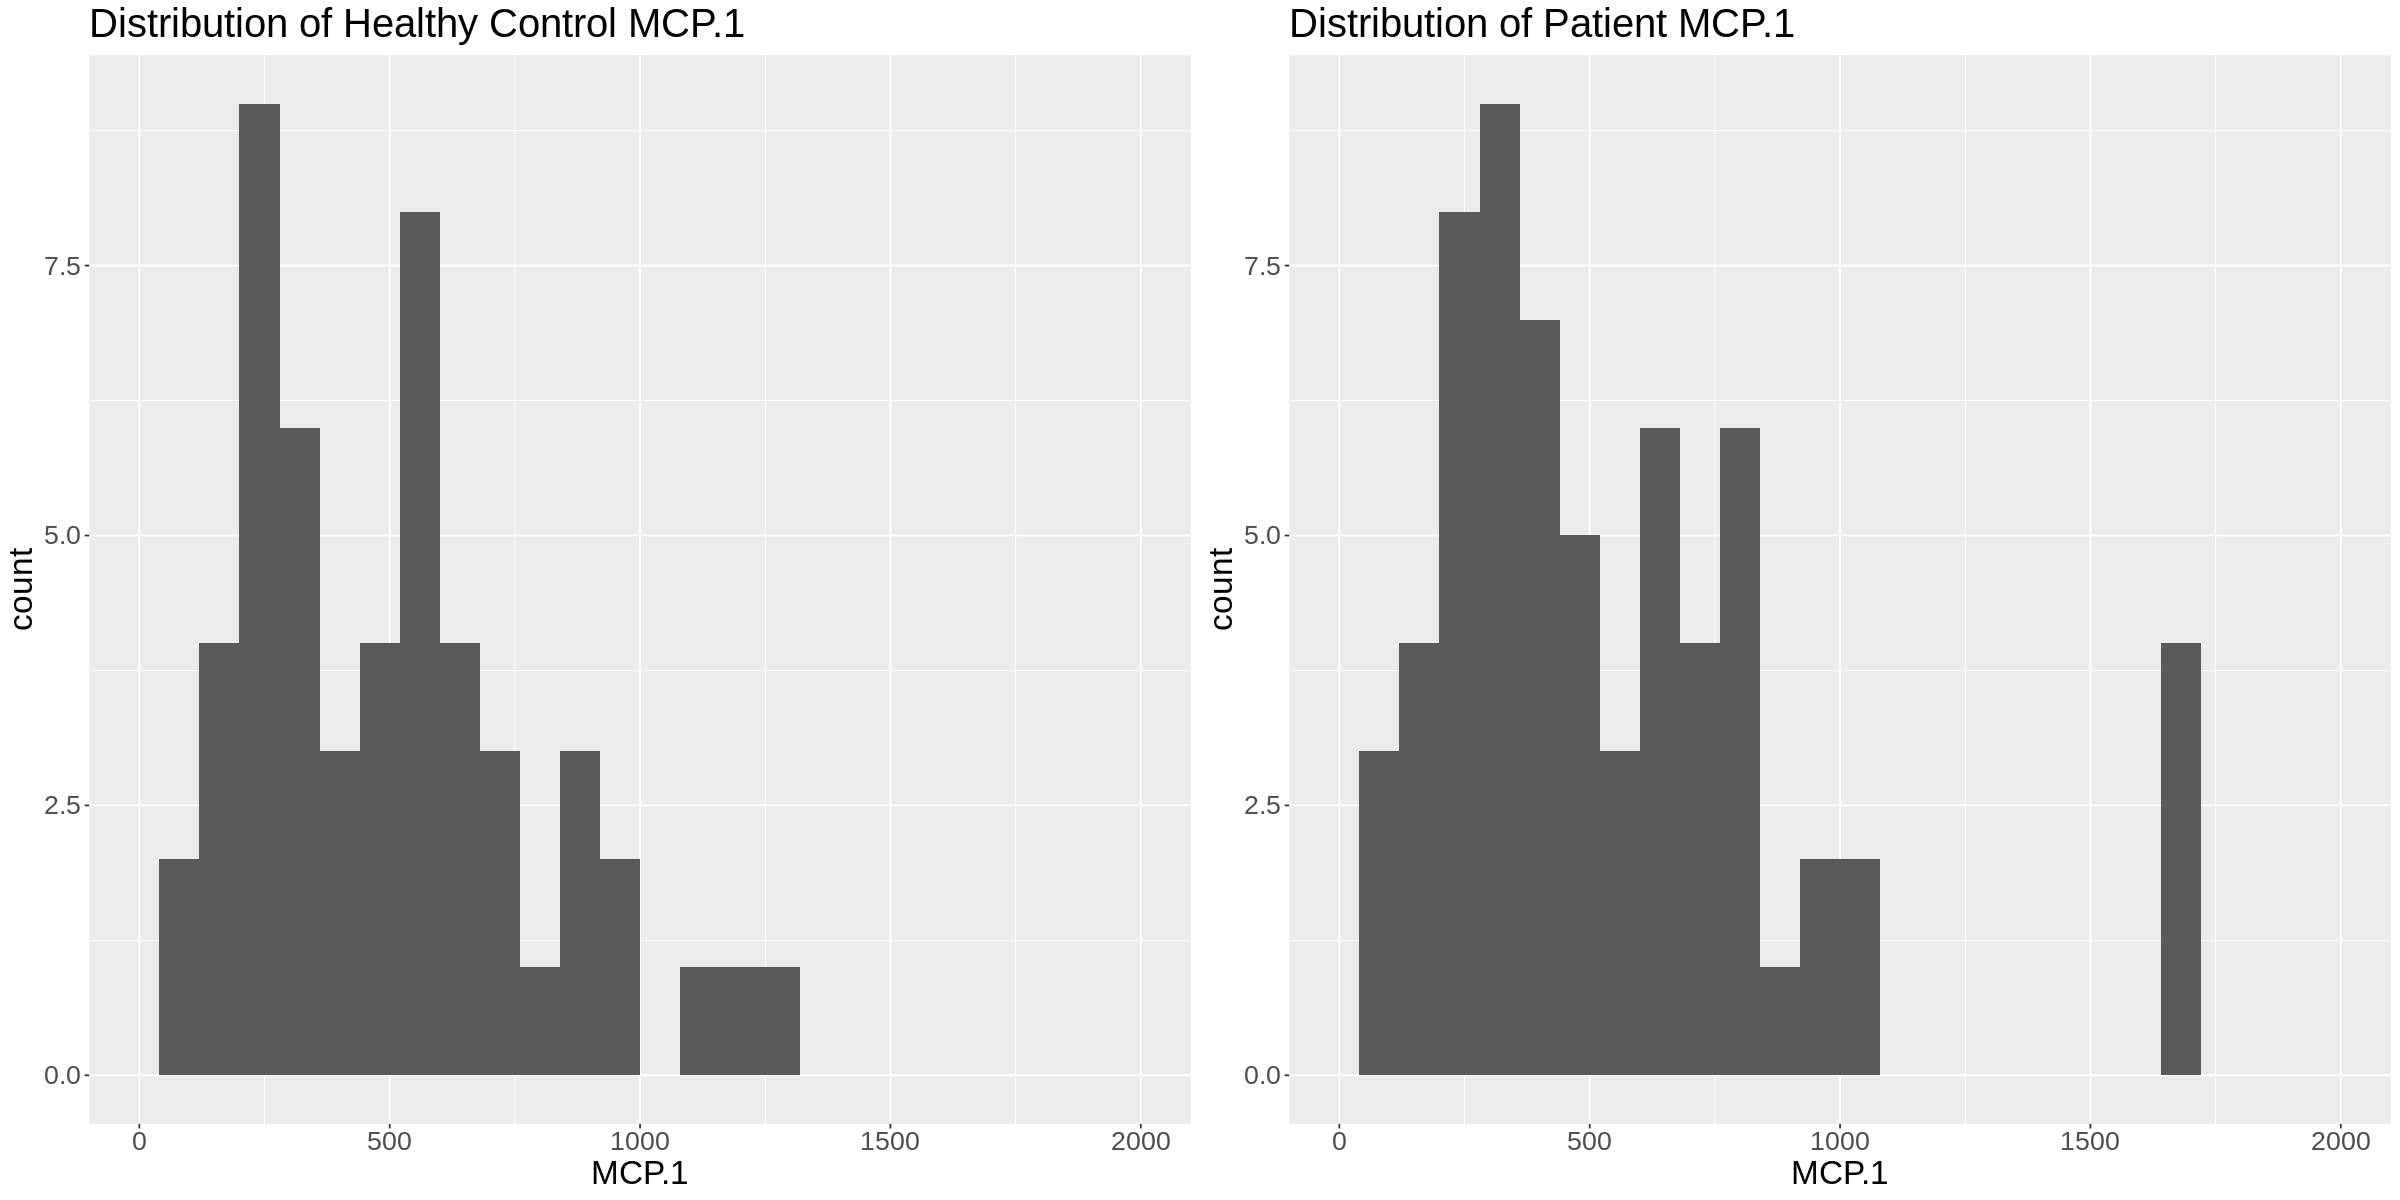

In [51]:
control_mcp_plot <- control %>%
    ggplot(aes(x = MCP.1)) +
    geom_histogram(binwidth = 80) + 
    labs(x = "MCP.1", title = paste('Distribution of Healthy Control MCP.1')) +
    theme(text = element_text(size=20)) +
    xlim(0, 2000)

patient_mcp_plot <- patient %>%
    ggplot(aes(x = MCP.1)) +
    geom_histogram(binwidth = 80) + 
    labs(x = "MCP.1", title = paste('Distribution of Patient MCP.1')) +
    theme(text = element_text(size=20)) +
    xlim(0, 2000)

plot_grid(control_mcp_plot, patient_mcp_plot)

**Figure 2.2** Healthy controls v.s. patients with respect to MCP.1

## scrap code

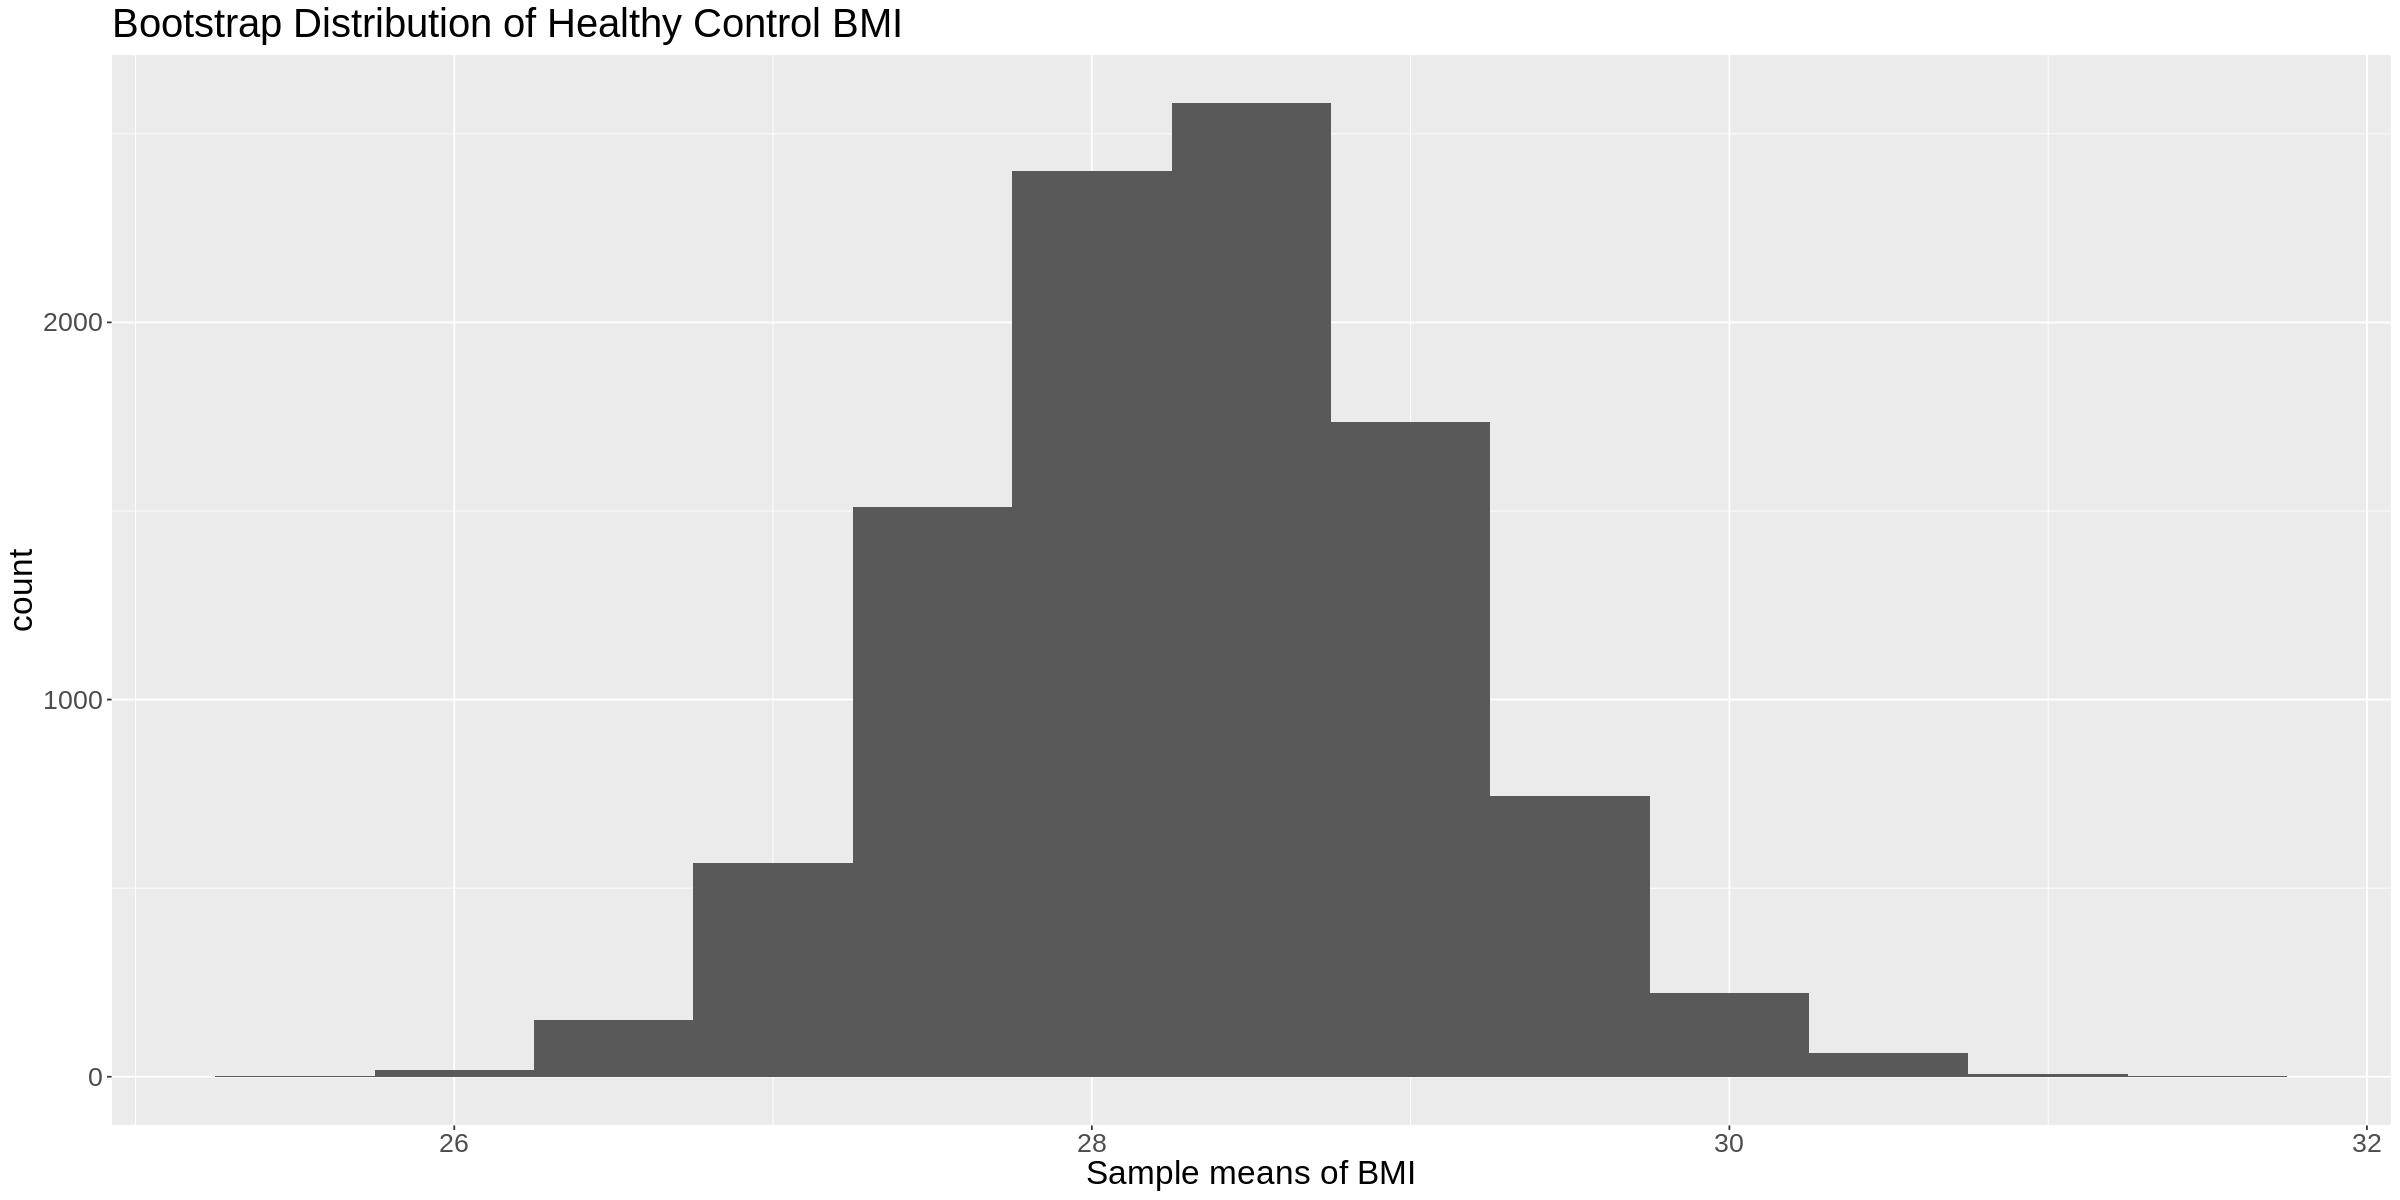

In [10]:
control_bootstrap <- control %>% 
    specify(response = BMI) %>% 
    generate(type = "bootstrap", reps = 10000) %>% 
    calculate(stat = "mean")

control_bootstrap_dist <- control_bootstrap %>%
    ggplot(aes(x = stat)) +
        geom_histogram(binwidth = 1/2) + 
        labs(x = "Sample means of BMI", title = 'Bootstrap Distribution of Healthy Control BMI') +
        theme(text = element_text(size=20))
control_bootstrap_dist

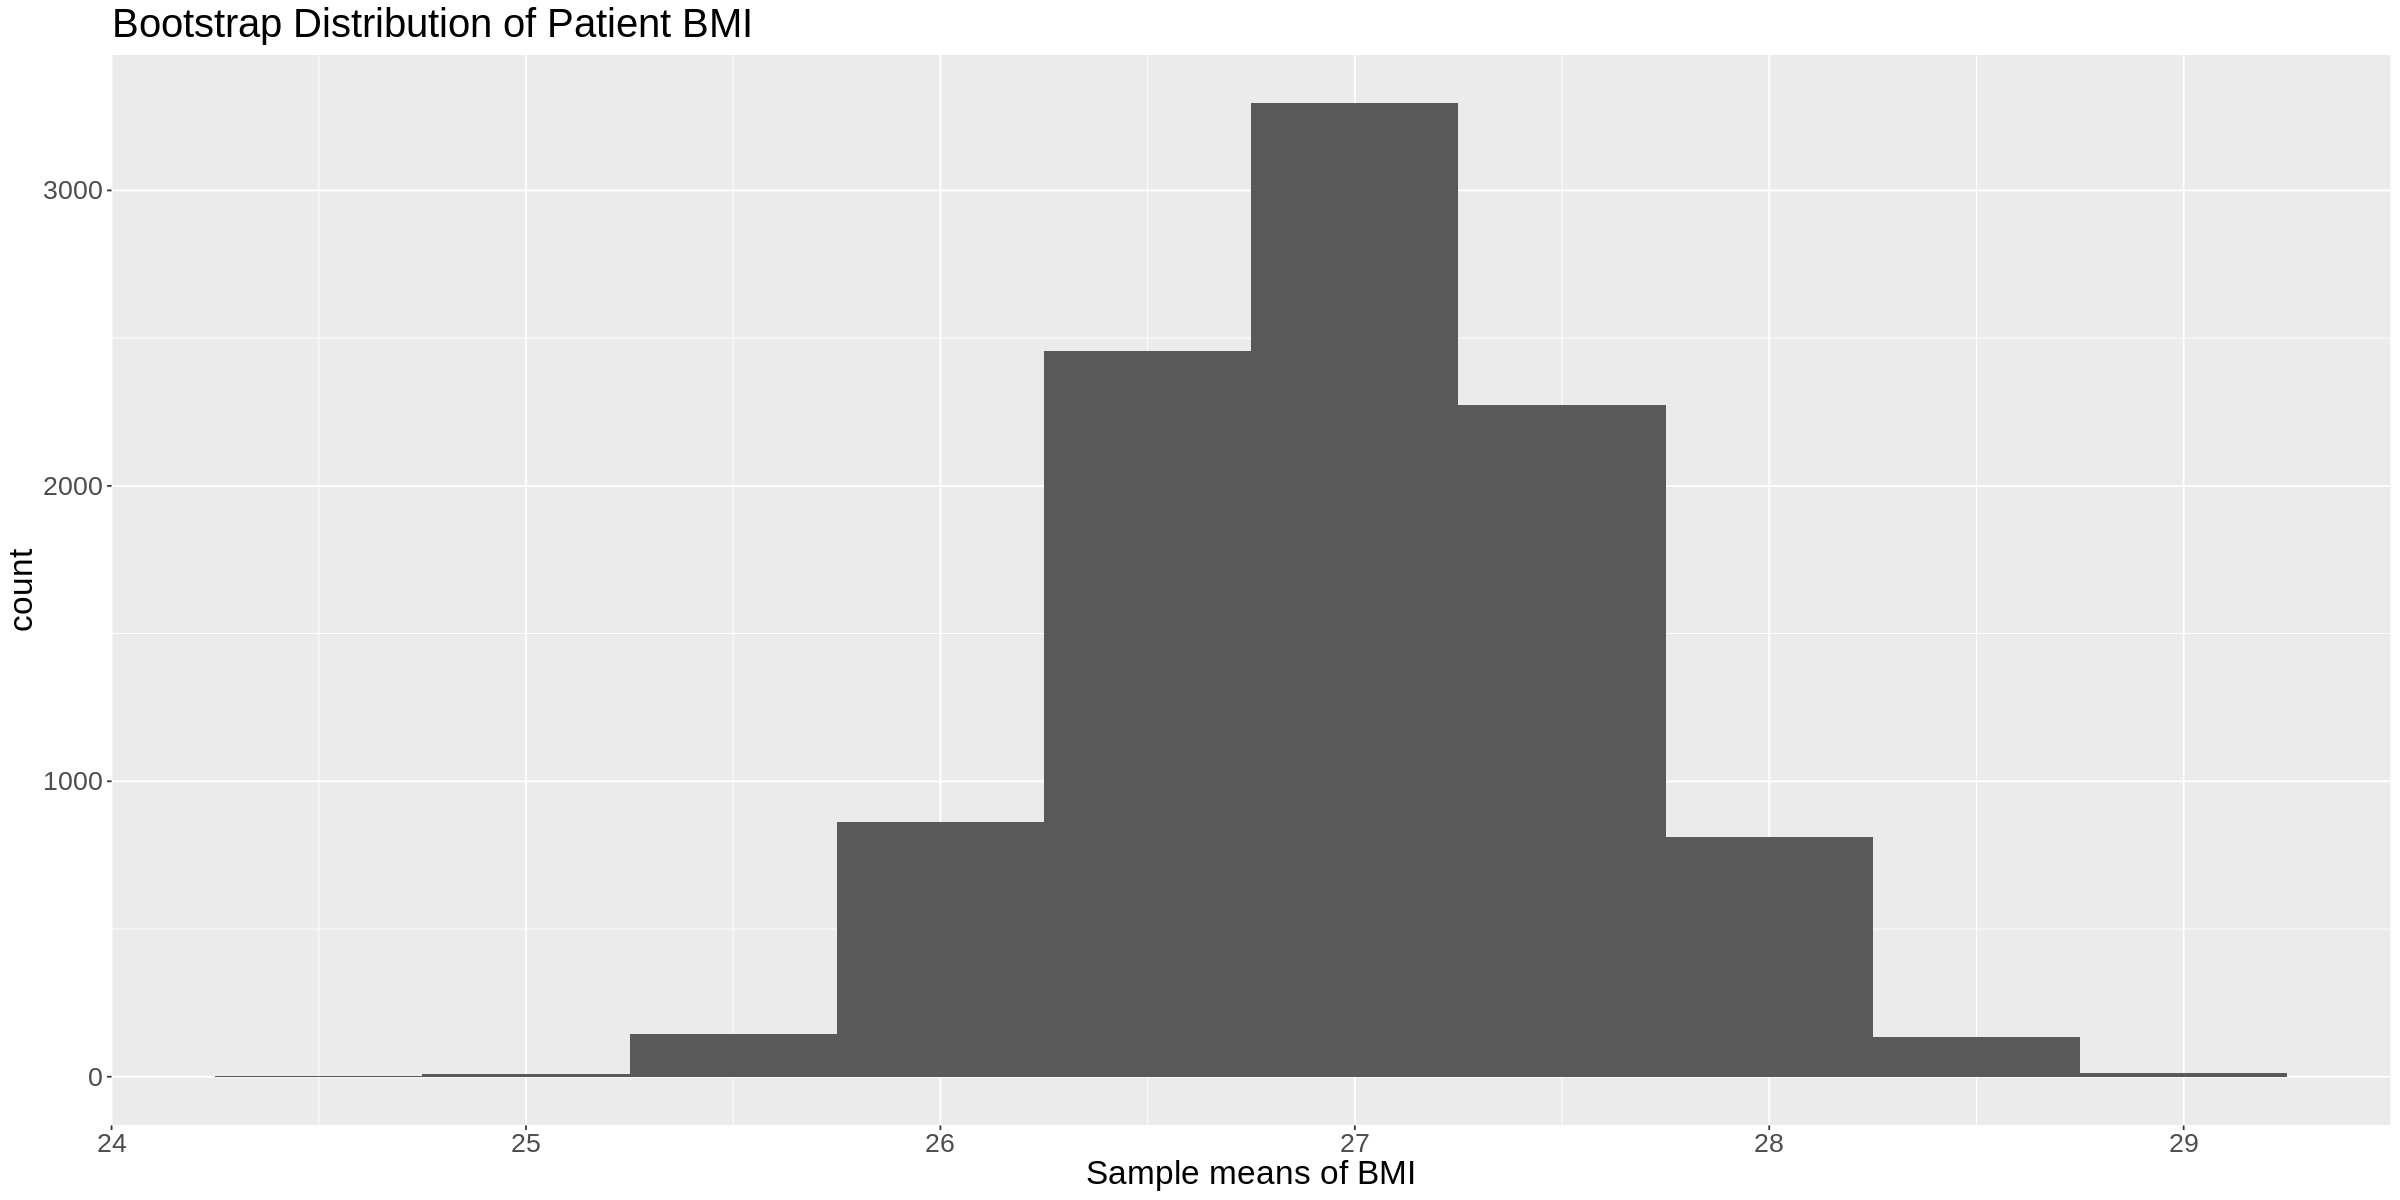

In [11]:
patient_bootstrap <- patient %>% 
    specify(response = BMI) %>% 
    generate(type = "bootstrap", reps = 10000) %>% 
    calculate(stat = "mean")

patient_bootstrap_dist <- patient_bootstrap %>%
    ggplot(aes(x = stat)) +
        geom_histogram(binwidth = 1/2) + 
        labs(x = "Sample means of BMI", title = 'Bootstrap Distribution of Patient BMI') +
        theme(text = element_text(size=20))
patient_bootstrap_dist

# INSULIN

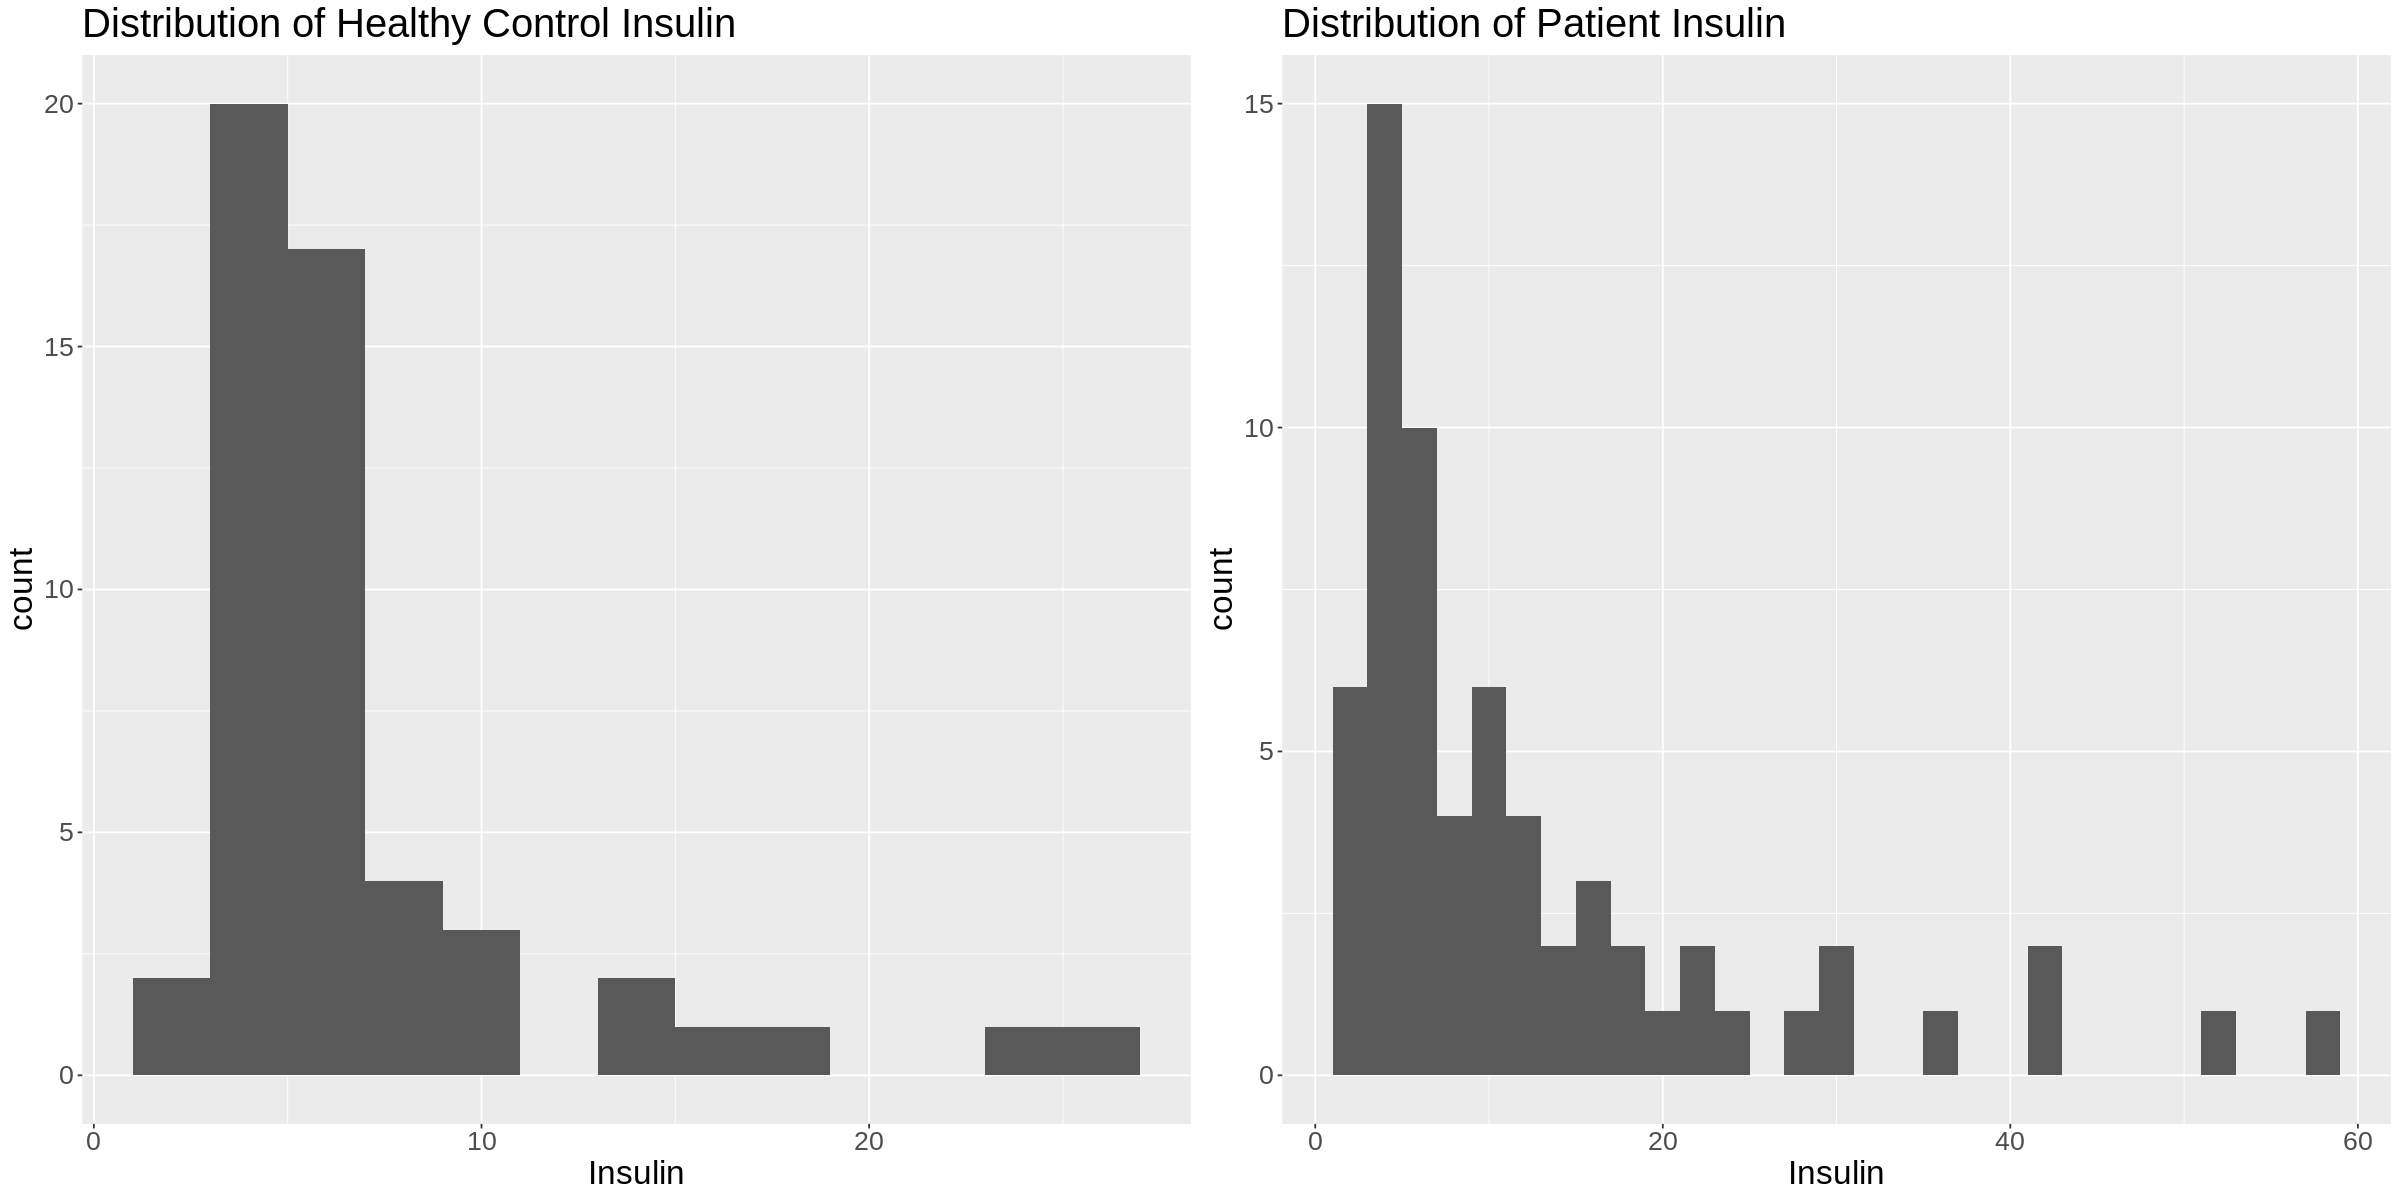

In [22]:
control_vs_patient_plots("Insulin")

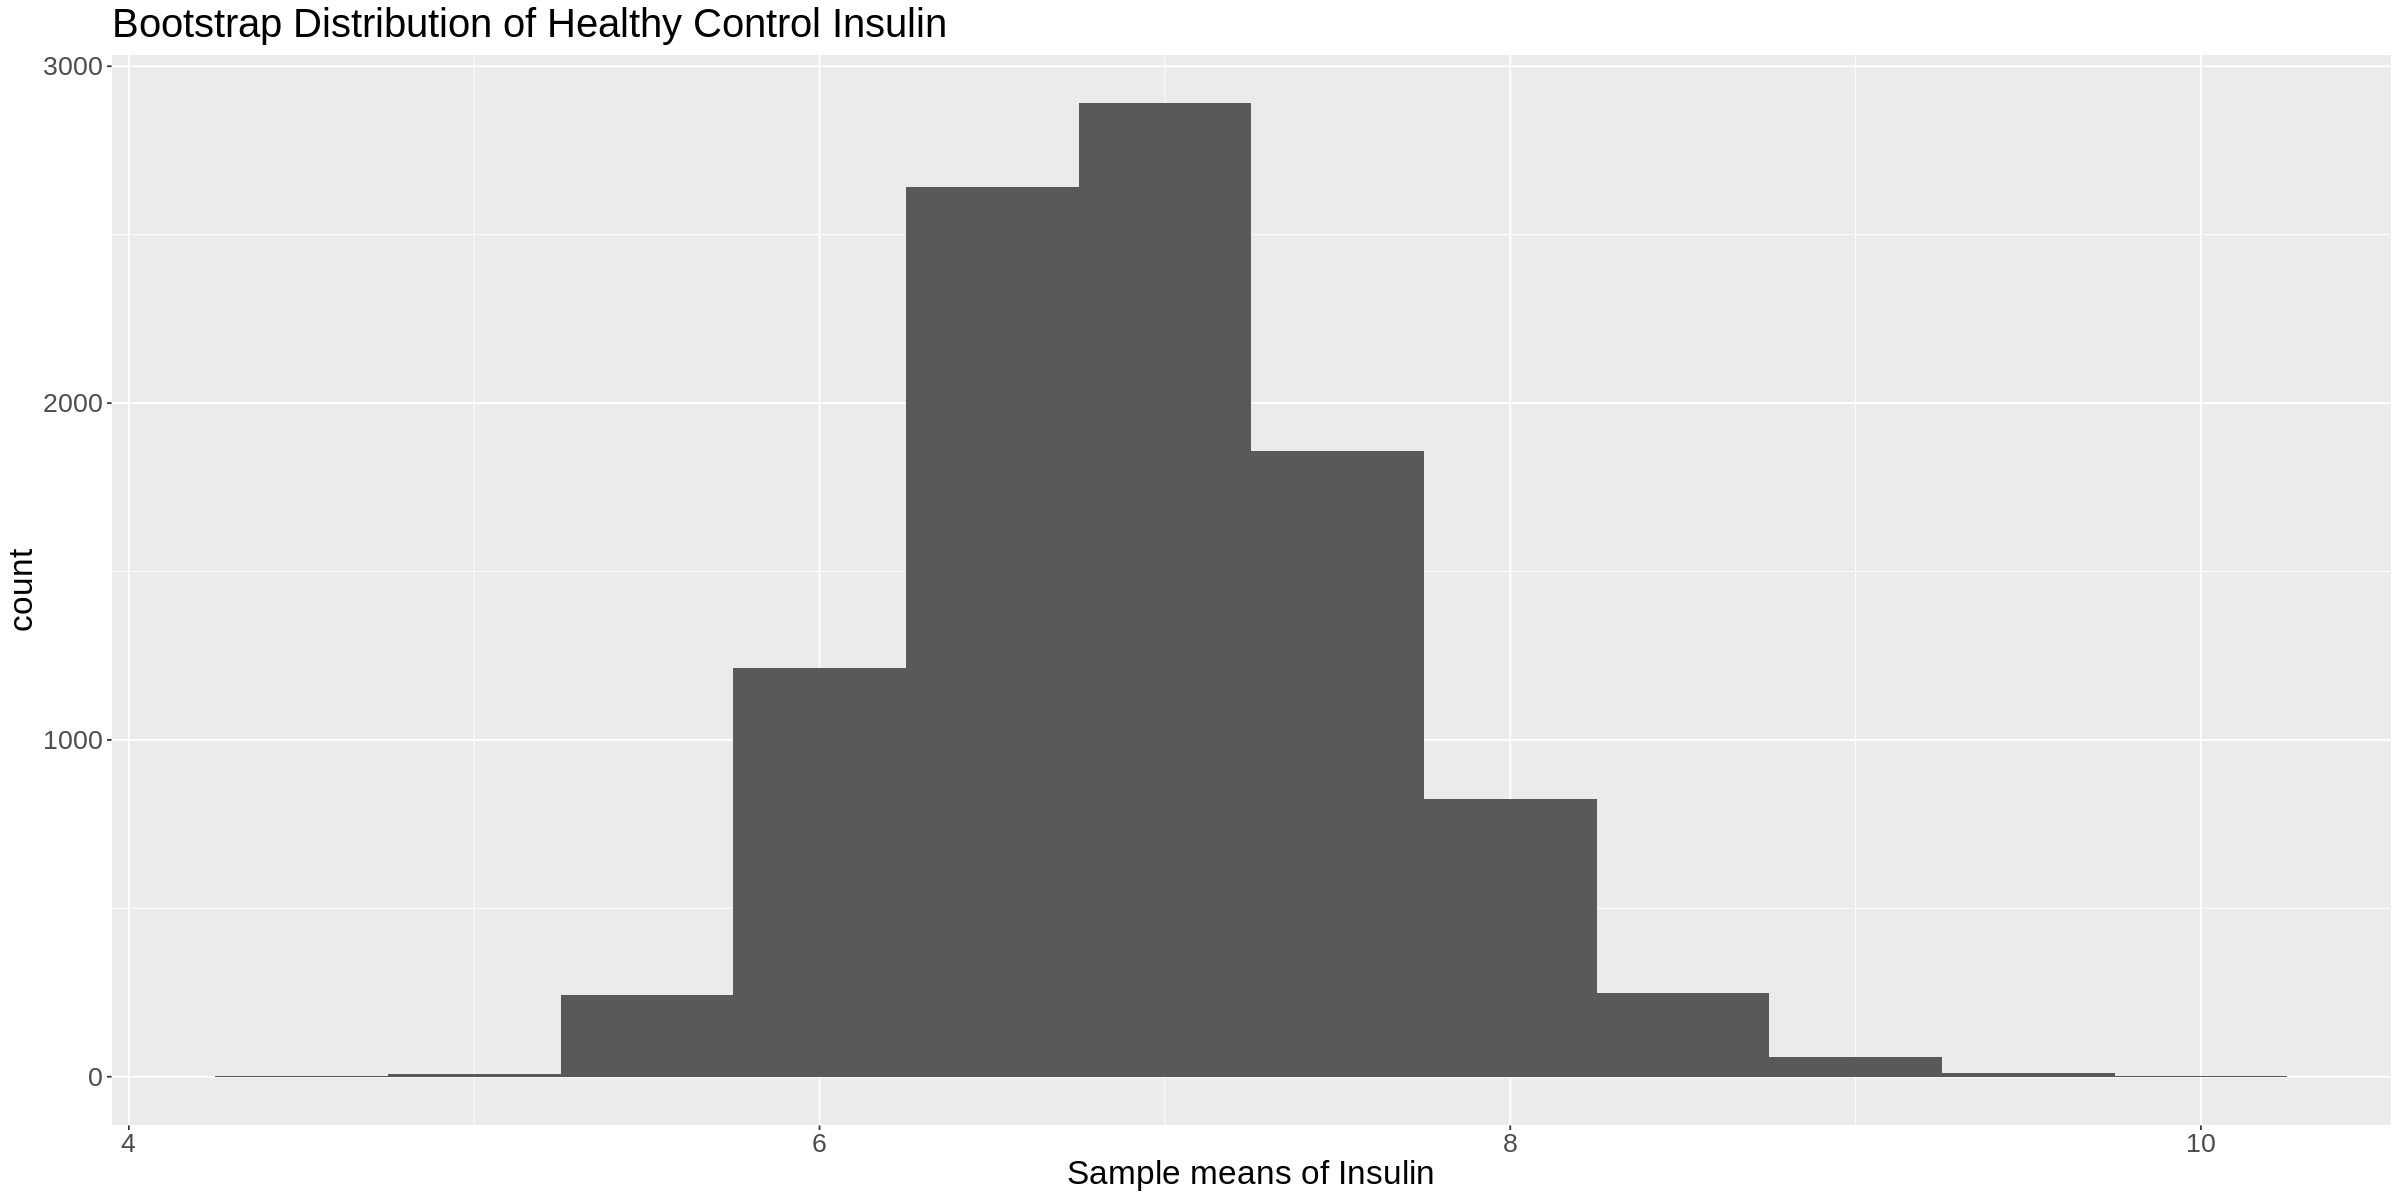

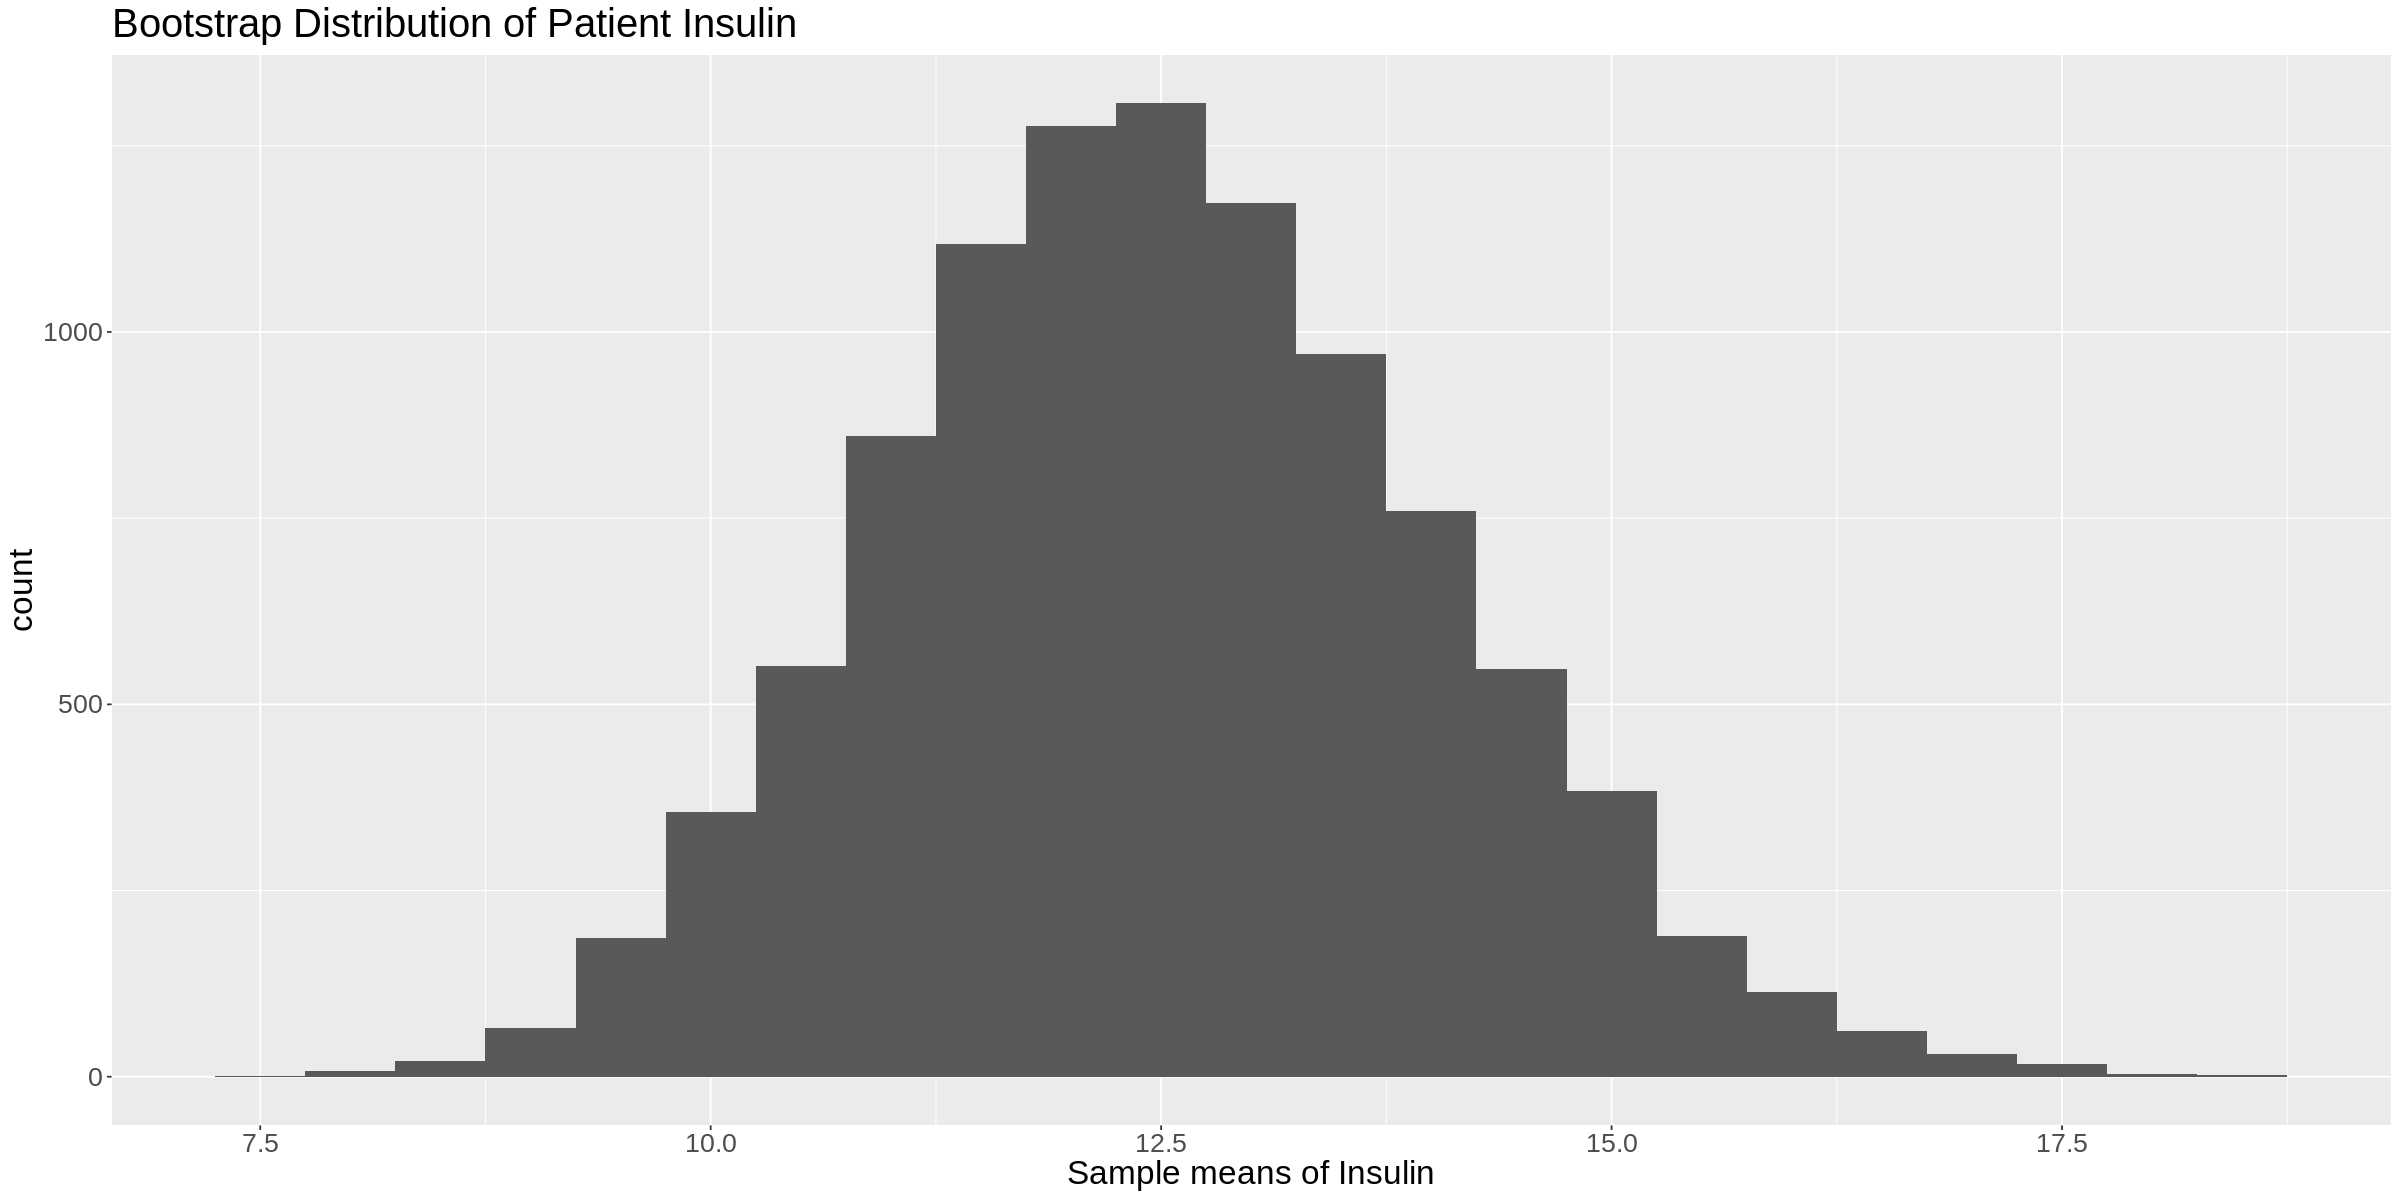

In [24]:
control_bootstrap_dist <- control %>% 
    specify(response = Insulin) %>% 
    generate(type = "bootstrap", reps = 10000) %>% 
    calculate(stat = "mean") %>%
    ggplot(aes(x = stat)) +
        geom_histogram(binwidth = 1/2) + 
        labs(x = "Sample means of Insulin", title = 'Bootstrap Distribution of Healthy Control Insulin') +
        theme(text = element_text(size=20))

patient_bootstrap_dist <- patient %>% 
    specify(response = Insulin) %>% 
    generate(type = "bootstrap", reps = 10000) %>% 
    calculate(stat = "mean") %>%
    ggplot(aes(x = stat)) +
        geom_histogram(binwidth = 1/2) + 
        labs(x = "Sample means of Insulin", title = 'Bootstrap Distribution of Patient Insulin') +
        theme(text = element_text(size=20))

control_bootstrap_dist
patient_bootstrap_dist

# MCP-1

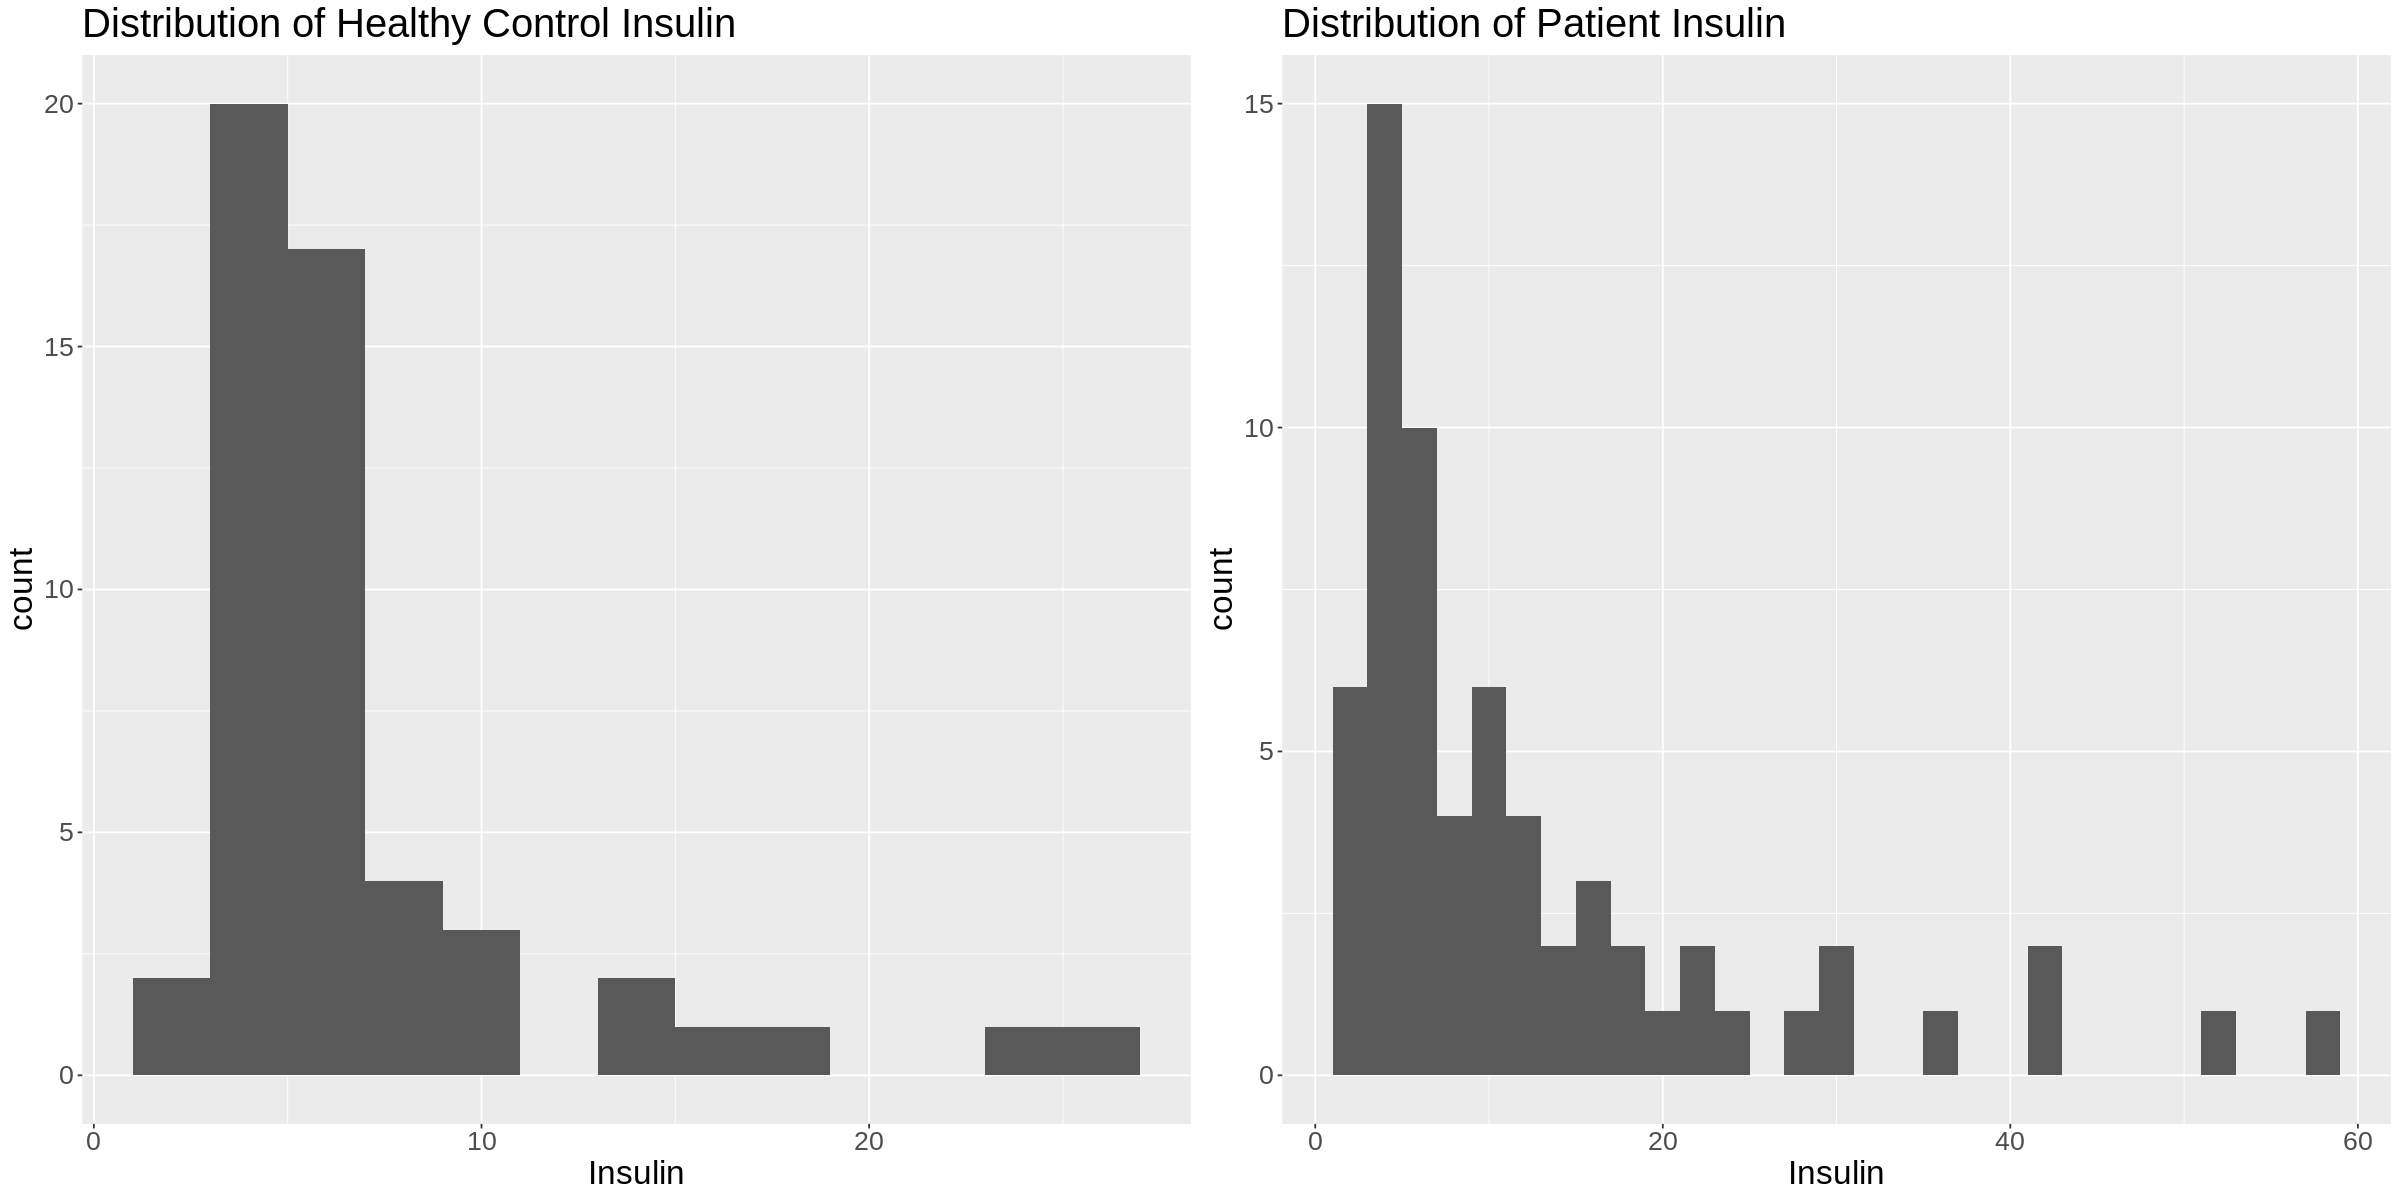

In [60]:
control_vs_patient_plots("Insulin")

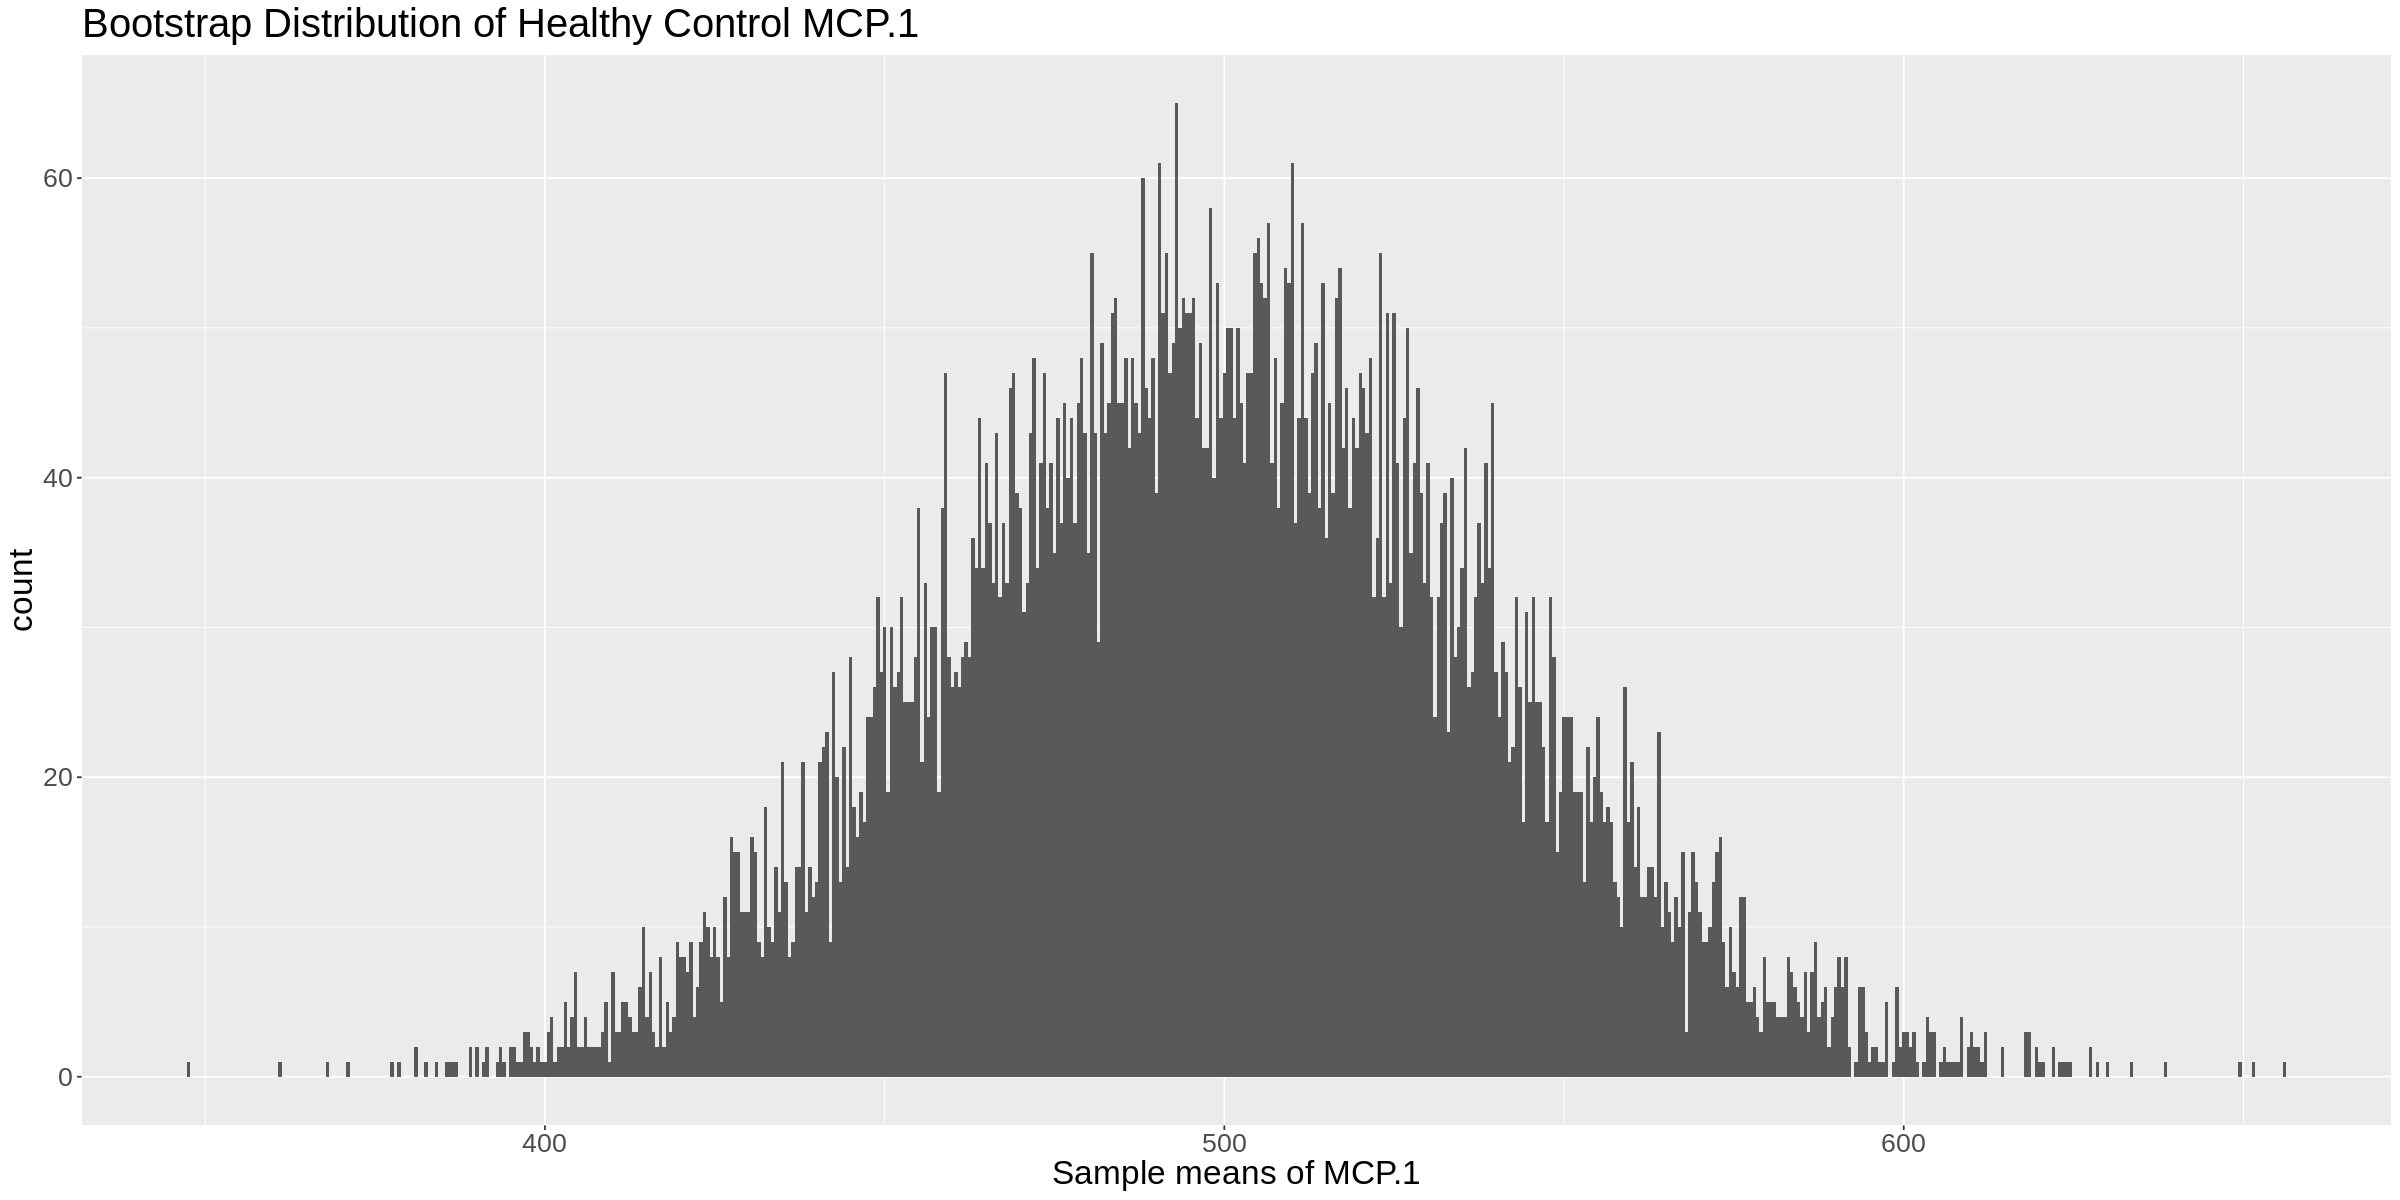

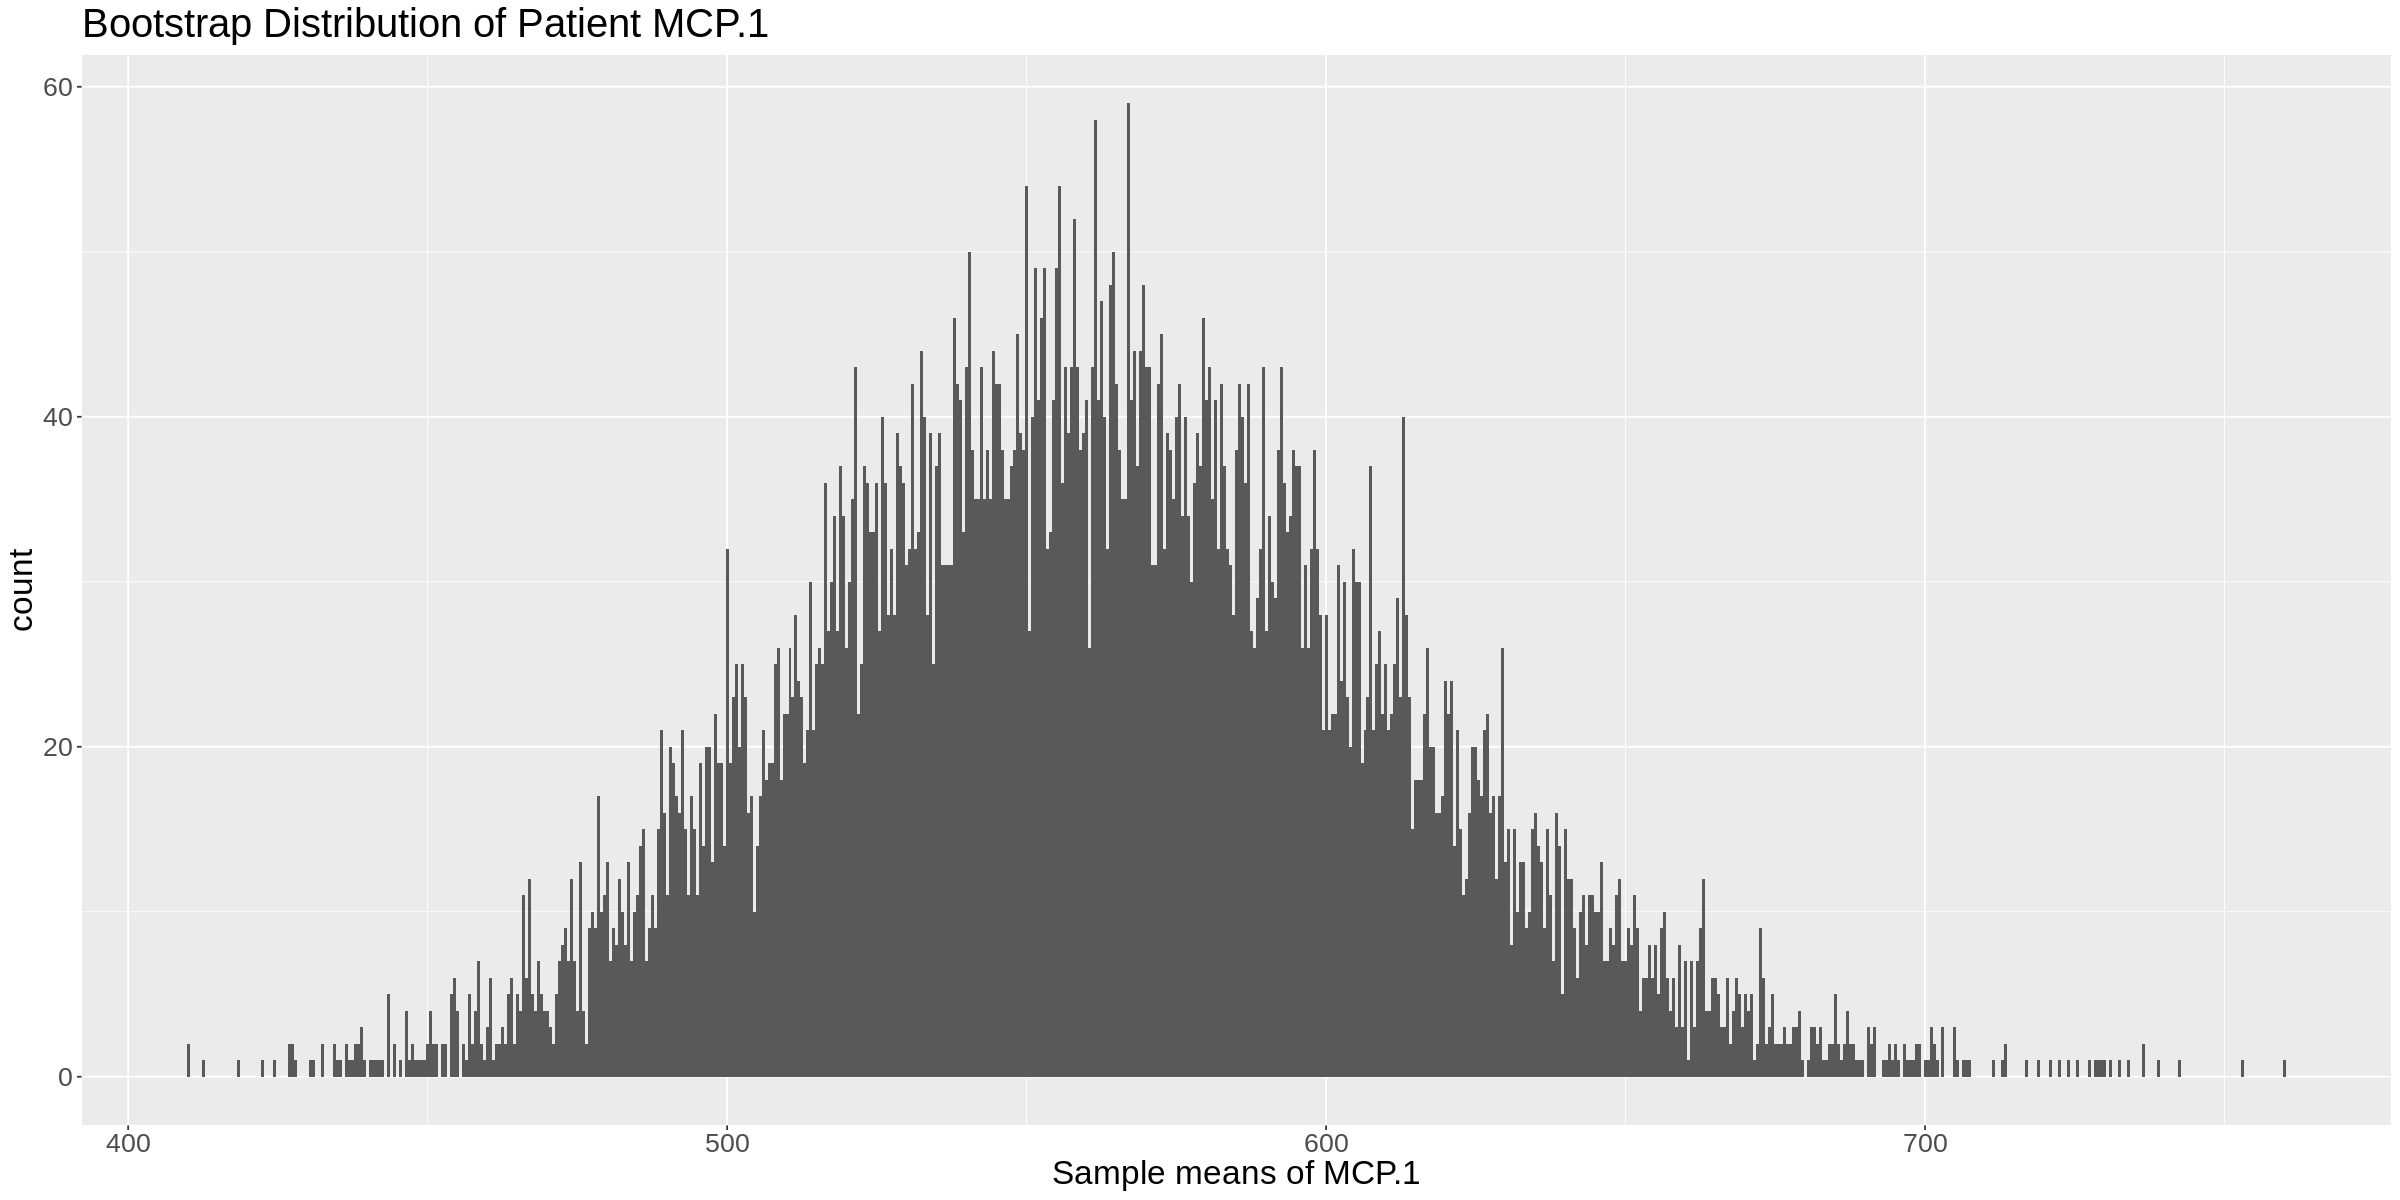

In [61]:
control_bootstrap_dist <- control %>% 
    specify(response = MCP.1) %>% 
    generate(type = "bootstrap", reps = 10000) %>% 
    calculate(stat = "mean") %>%
    ggplot(aes(x = stat)) +
        geom_histogram(binwidth = 1/2) + 
        labs(x = "Sample means of MCP.1", title = 'Bootstrap Distribution of Healthy Control MCP.1') +
        theme(text = element_text(size=20))

patient_bootstrap_dist <- patient %>% 
    specify(response = MCP.1) %>% 
    generate(type = "bootstrap", reps = 10000) %>% 
    calculate(stat = "mean") %>%
    ggplot(aes(x = stat)) +
        geom_histogram(binwidth = 1/2) + 
        labs(x = "Sample means of MCP.1", title = 'Bootstrap Distribution of Patient MCP.1') +
        theme(text = element_text(size=20))

control_bootstrap_dist
patient_bootstrap_dist

In [57]:
bootstrap_fn <- function(s) {
    control_bootstrap_dist <- control %>% 
    specify(response = s) %>% 
    generate(type = "bootstrap", reps = 10000) %>% 
    calculate(stat = "mean") %>%
    ggplot(aes(x = stat)) +
        geom_histogram(binwidth = 1/2) + 
        # labs(x = paste("Sample means of", s), title = paste('Bootstrap Distribution of Patient', s)) +
        theme(text = element_text(size=20))
    return(control_bootstrap_dist)
    }


In [59]:
bootstrap_fn(Insulin)

ERROR: Error in specify_string(., response = s): could not find function "specify_string"


In [12]:
# create a function for generating control v.s. patient plots with variable s
control_vs_patient_plots <- function(s) {
    control_s_dist <- control %>%
        ggplot(aes_string(x = s)) +
        geom_histogram(binwidth = 2) + 
        labs(x = s, title = paste('Distribution of Healthy Control', s)) +
        theme(text = element_text(size=20))
    
    patient_s_dist <- patient %>%
        ggplot(aes_string(x = s)) +
        geom_histogram(binwidth = 2) + 
        labs(x = s, title = paste('Distribution of Patient', s)) +
        theme(text = element_text(size=20))
  return(plot_grid(control_s_dist, patient_s_dist))
}

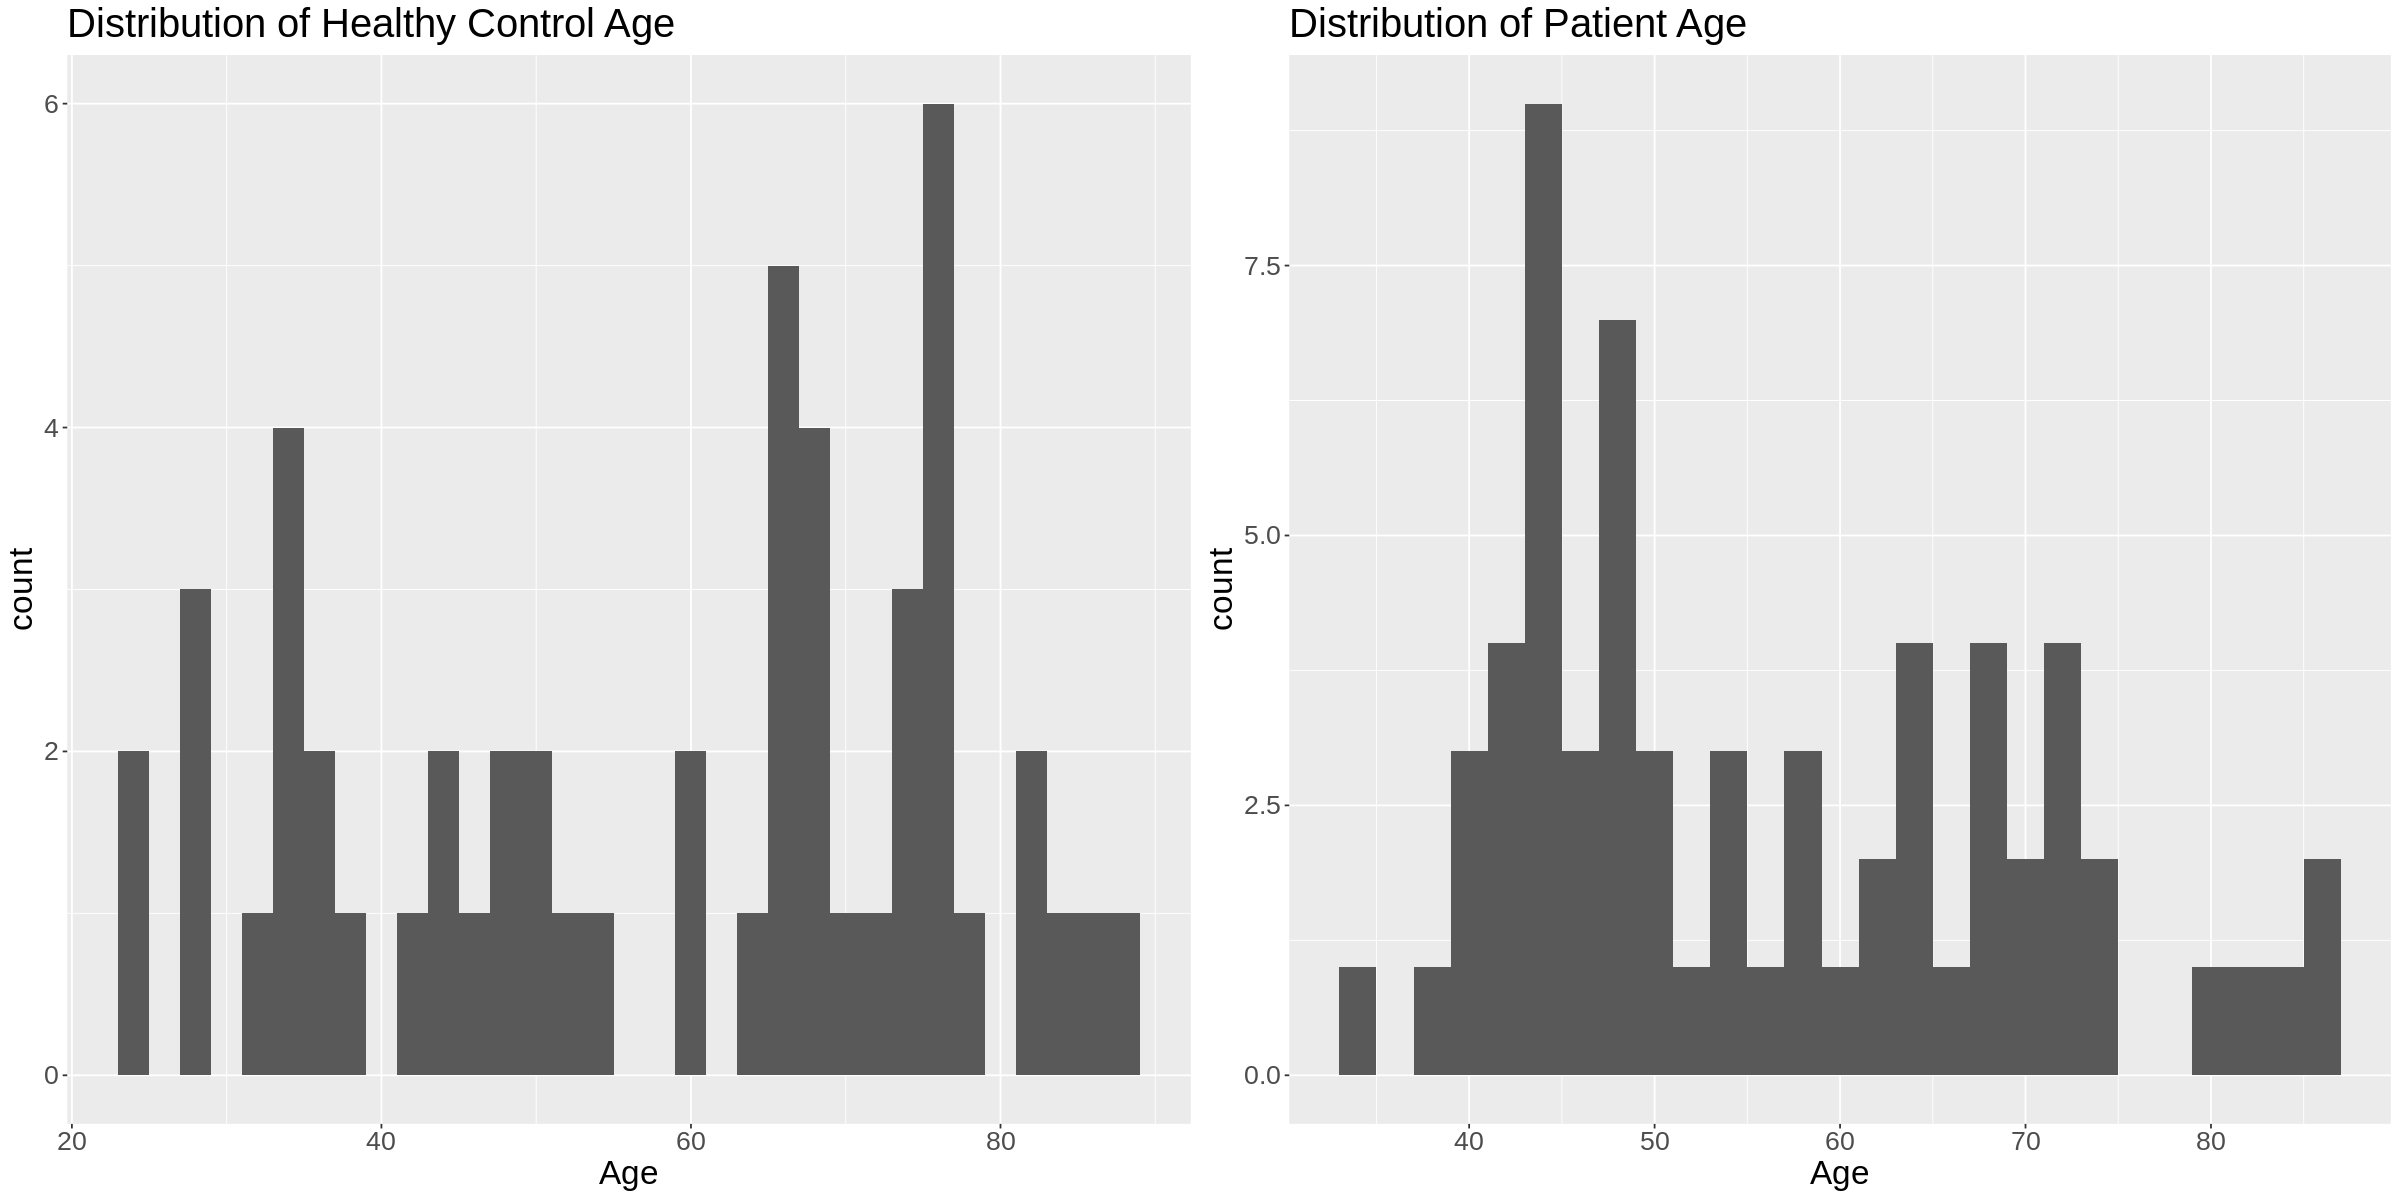

In [13]:
control_vs_patient_plots("Age")

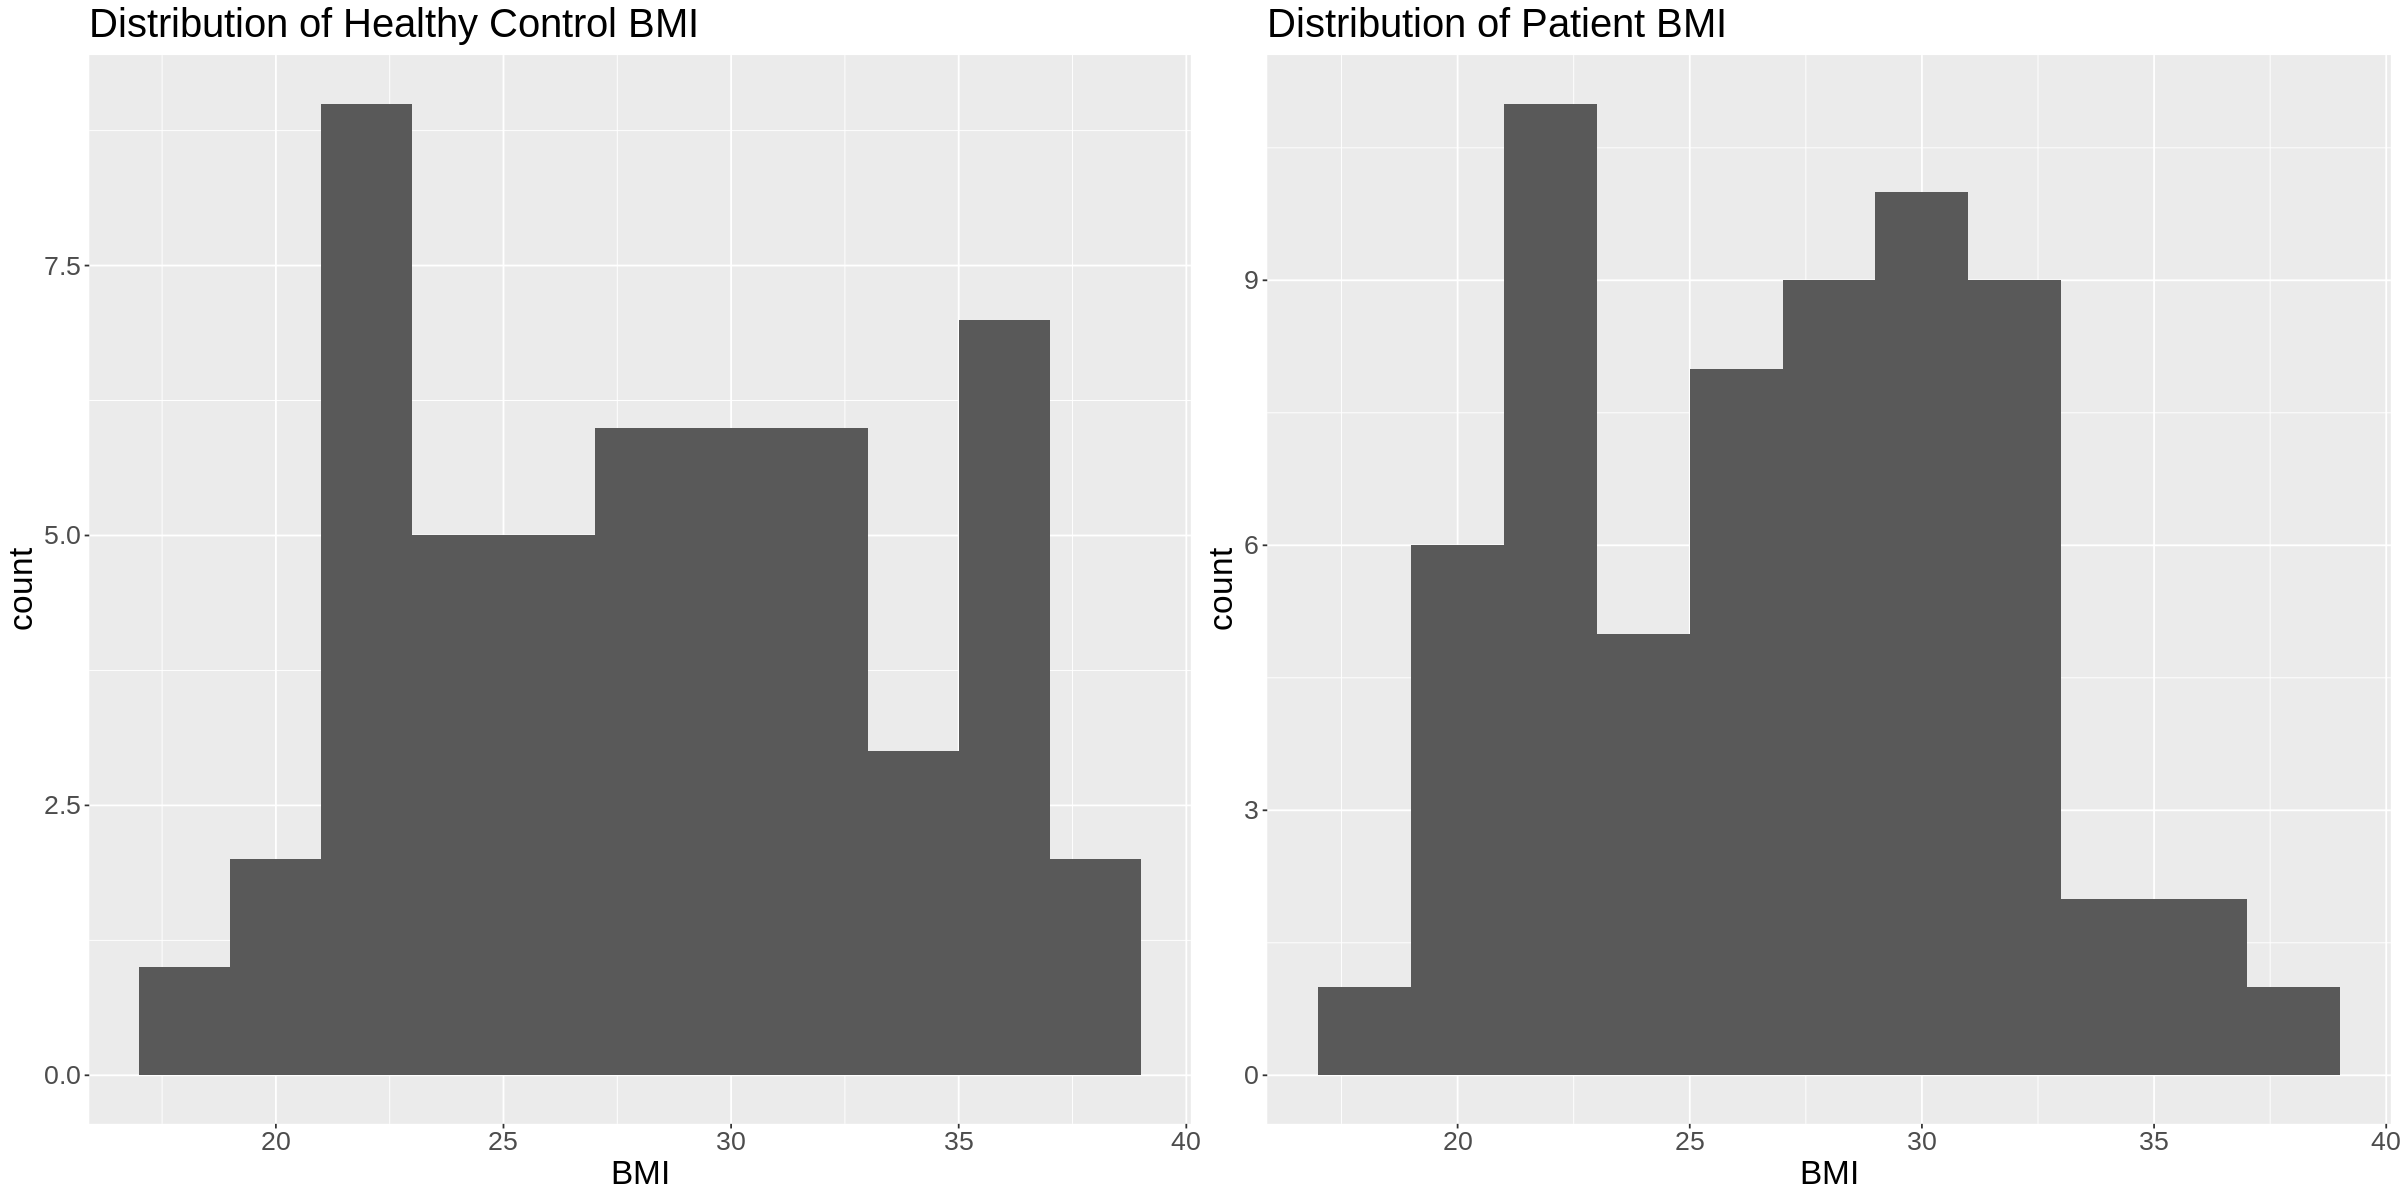

In [14]:
control_vs_patient_plots("BMI")

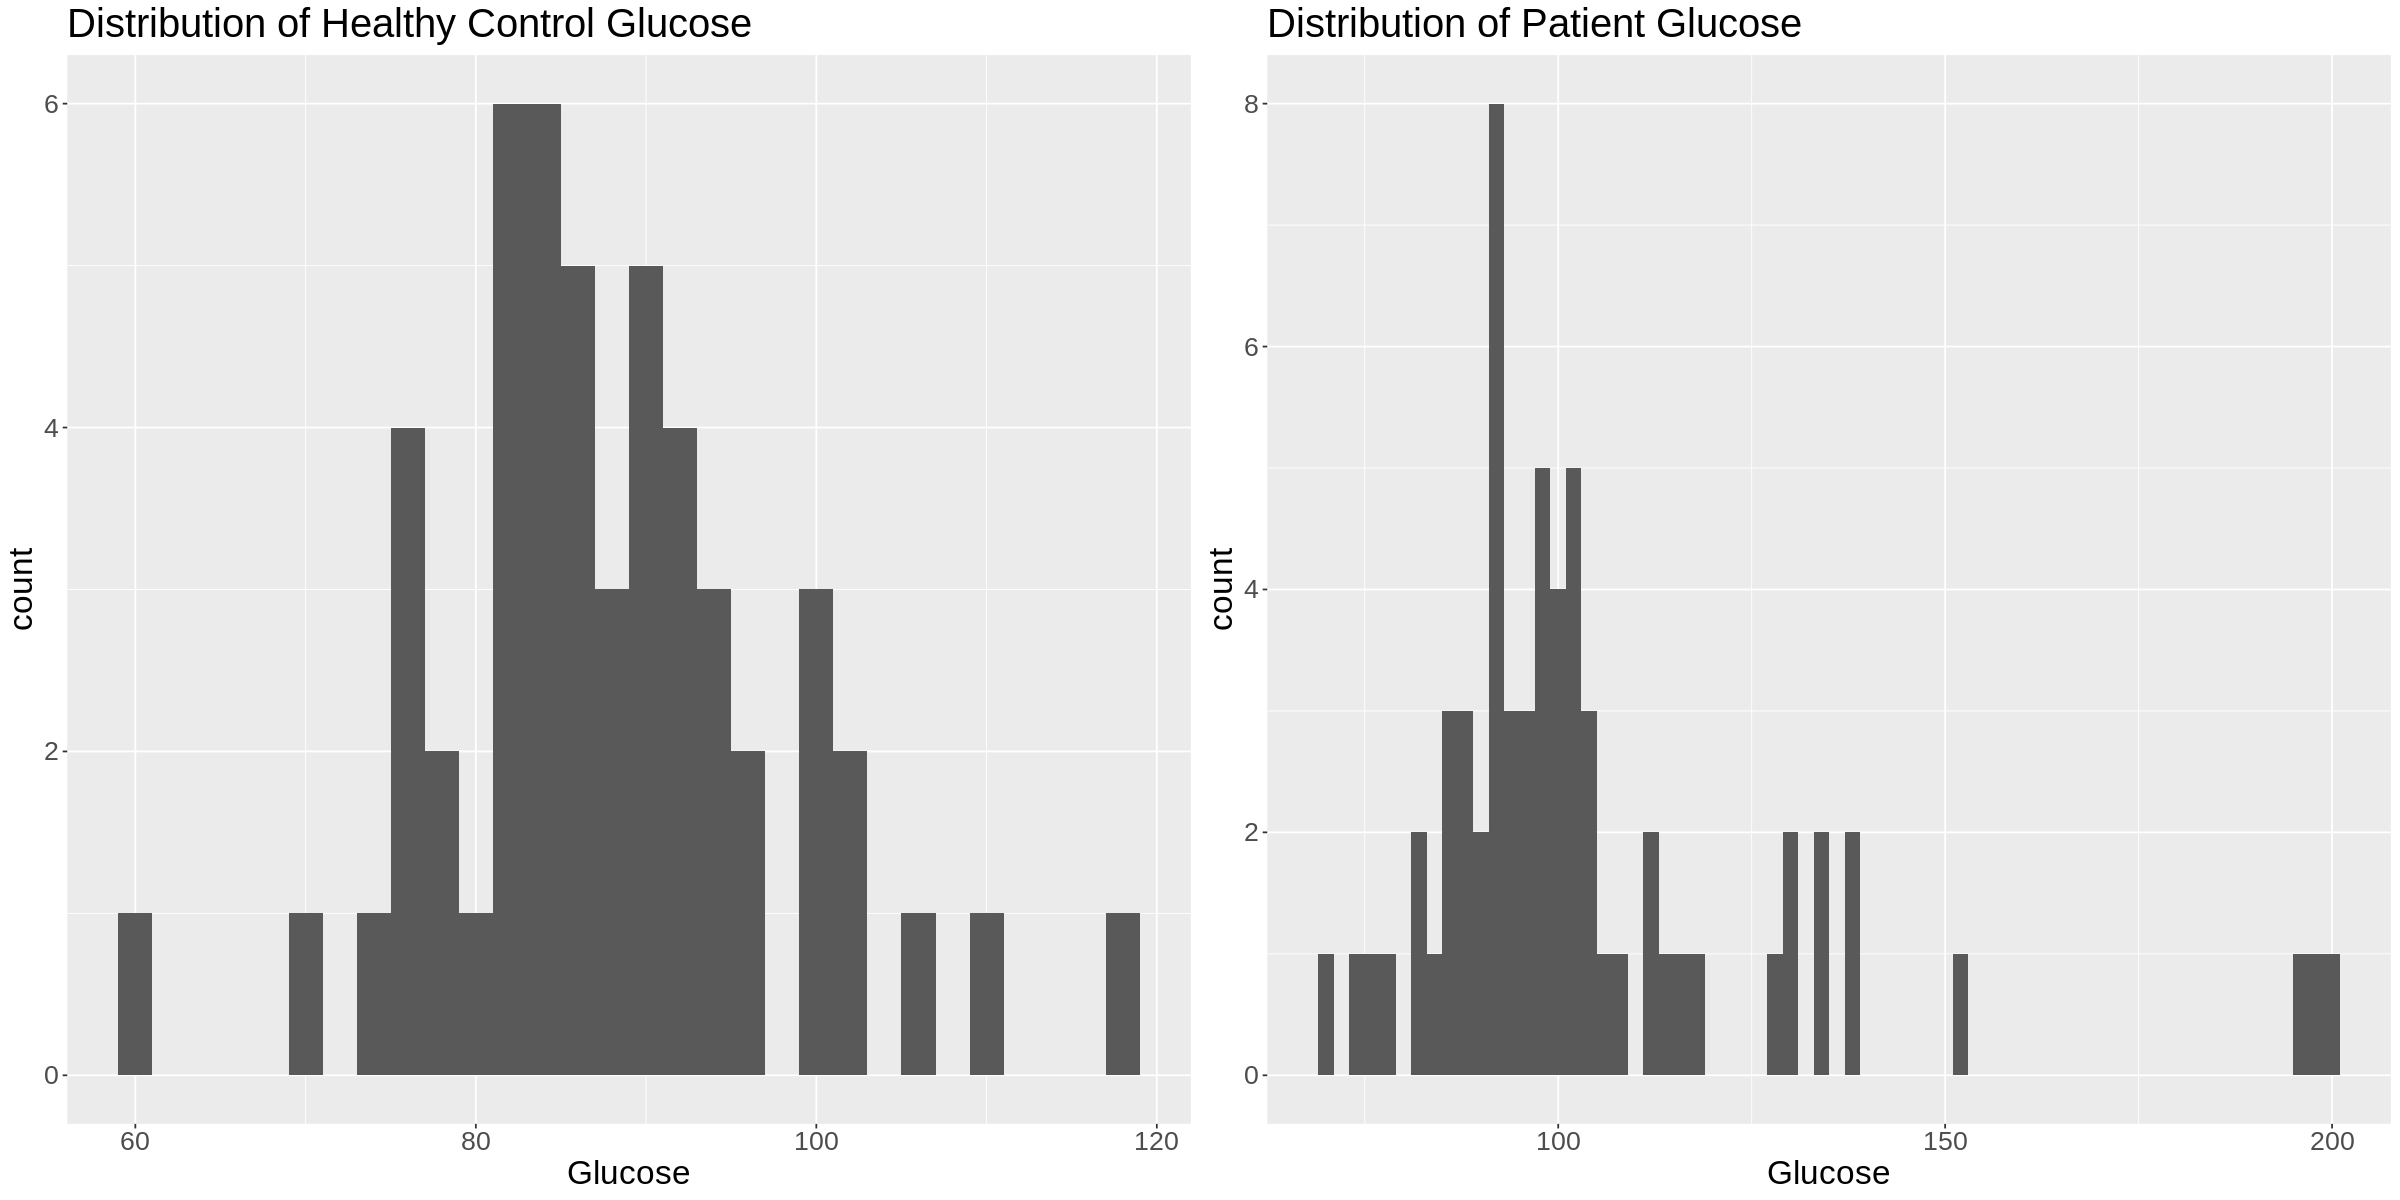

In [15]:
control_vs_patient_plots("Glucose")

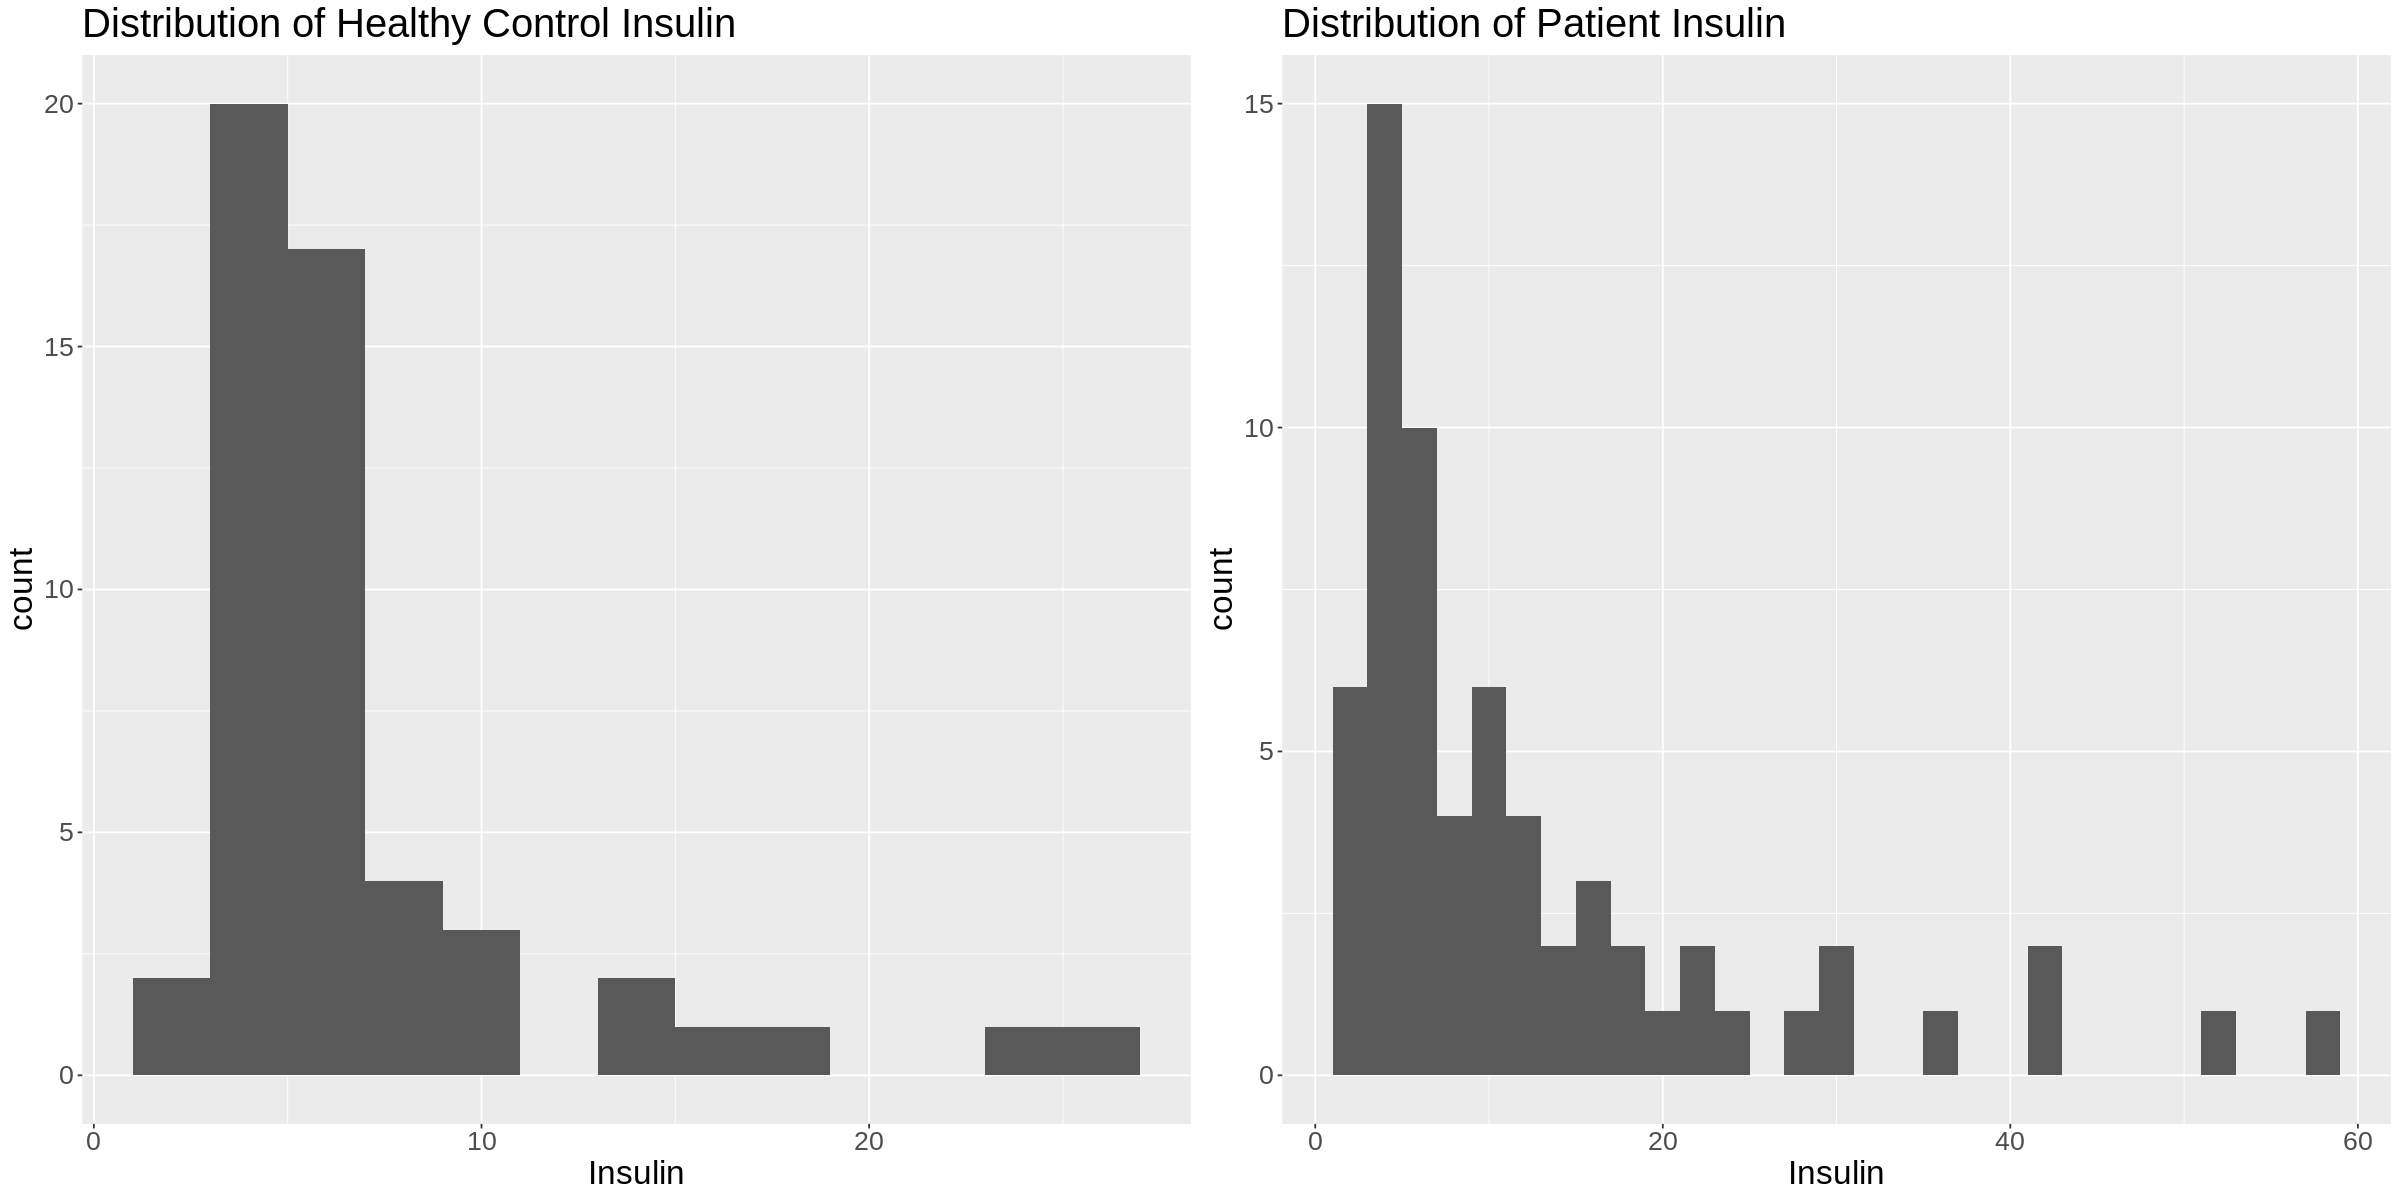

In [16]:
control_vs_patient_plots("Insulin")

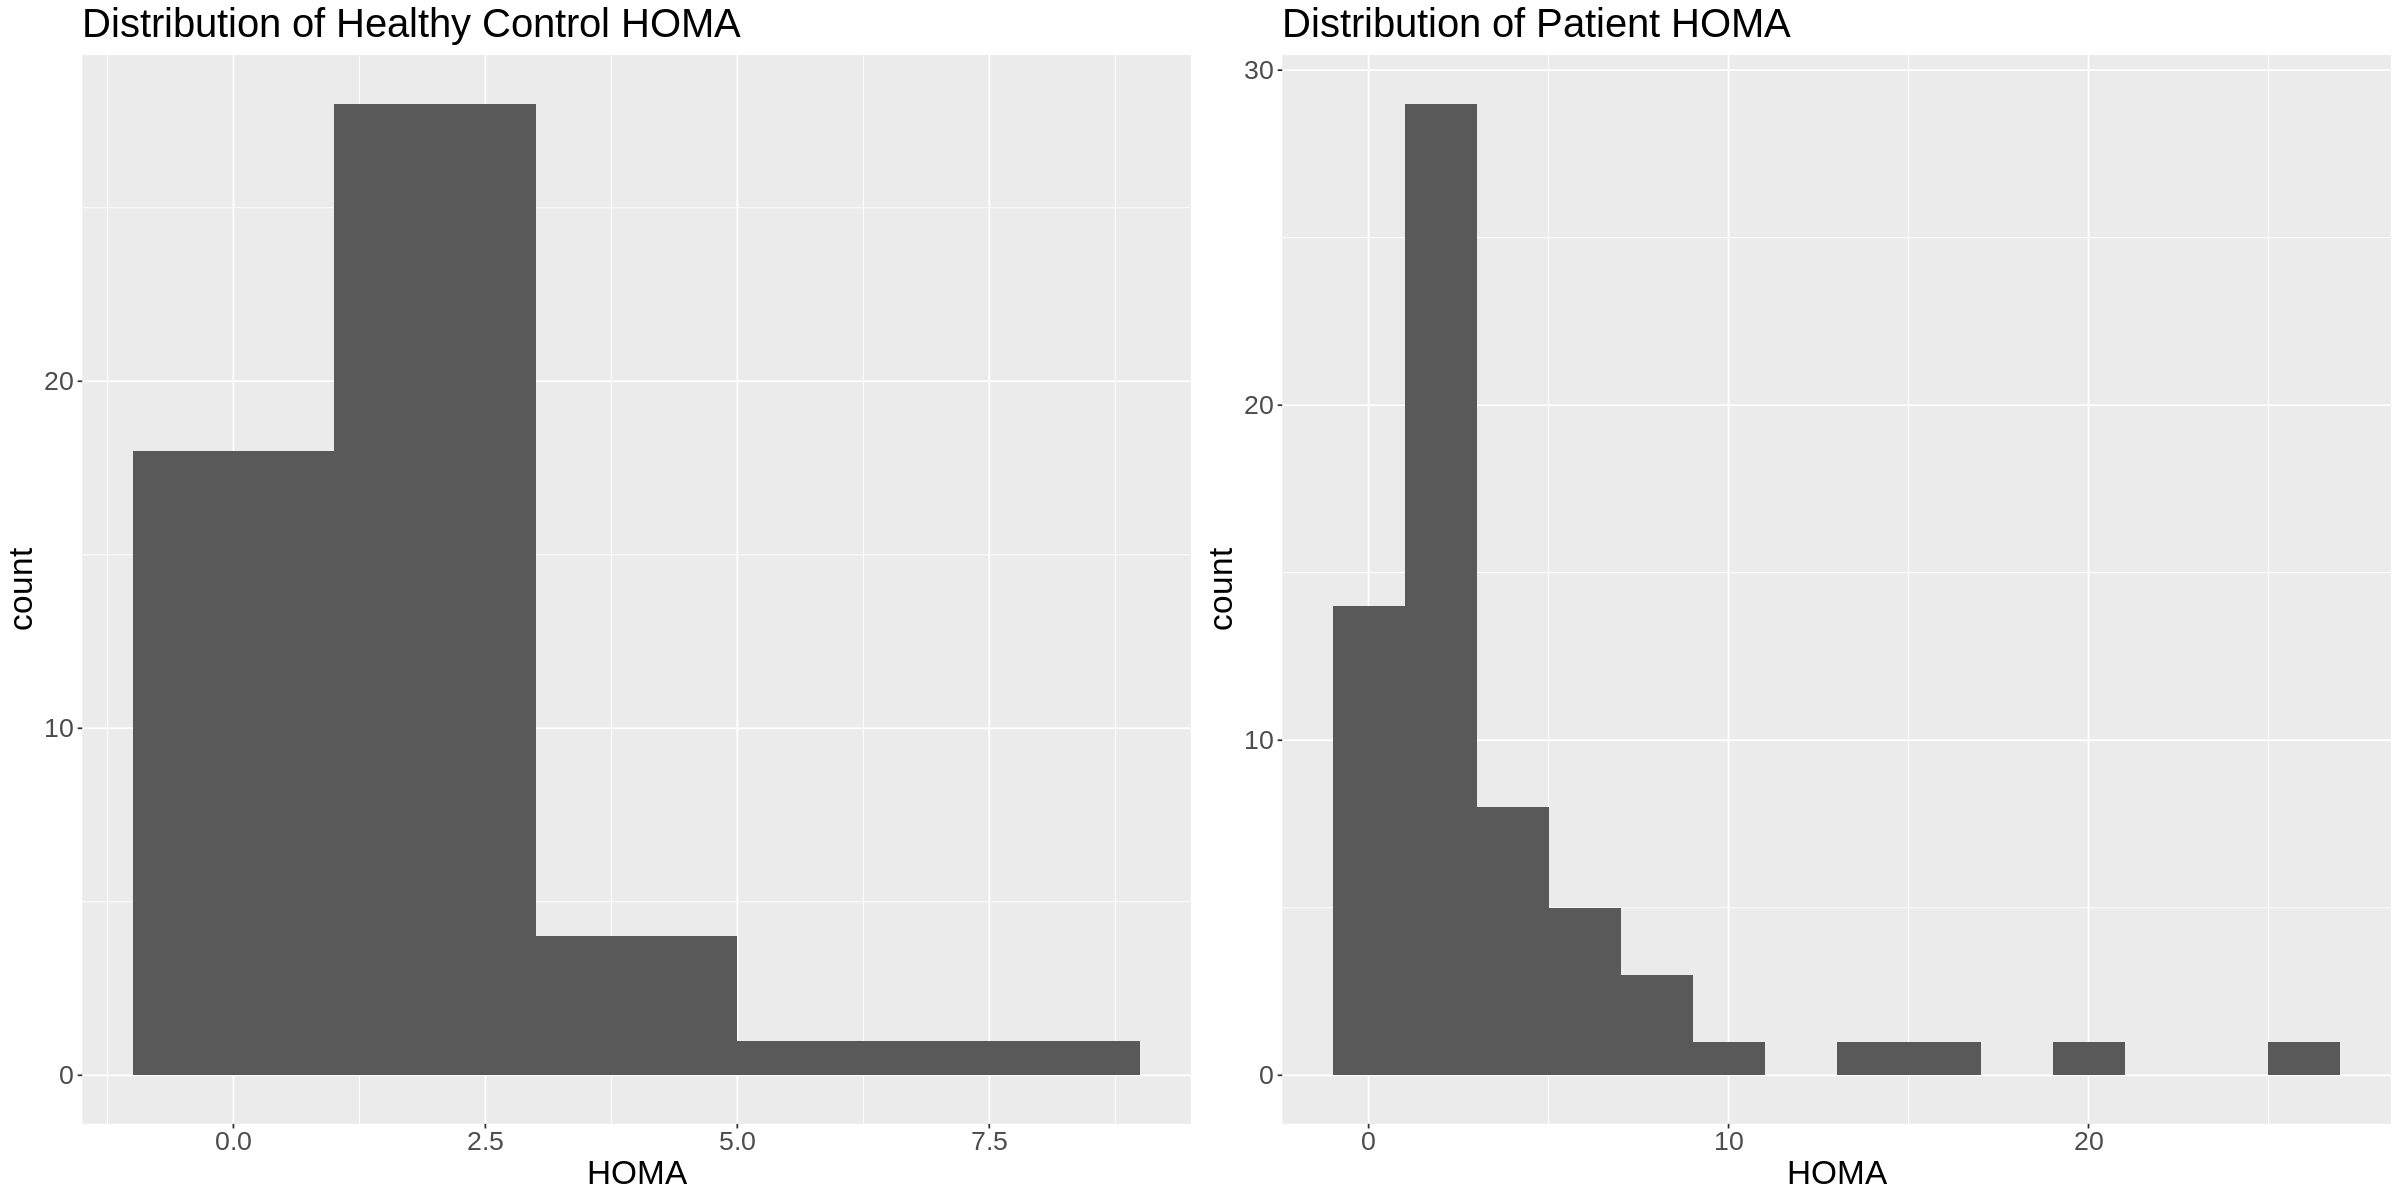

In [17]:
control_vs_patient_plots("HOMA")

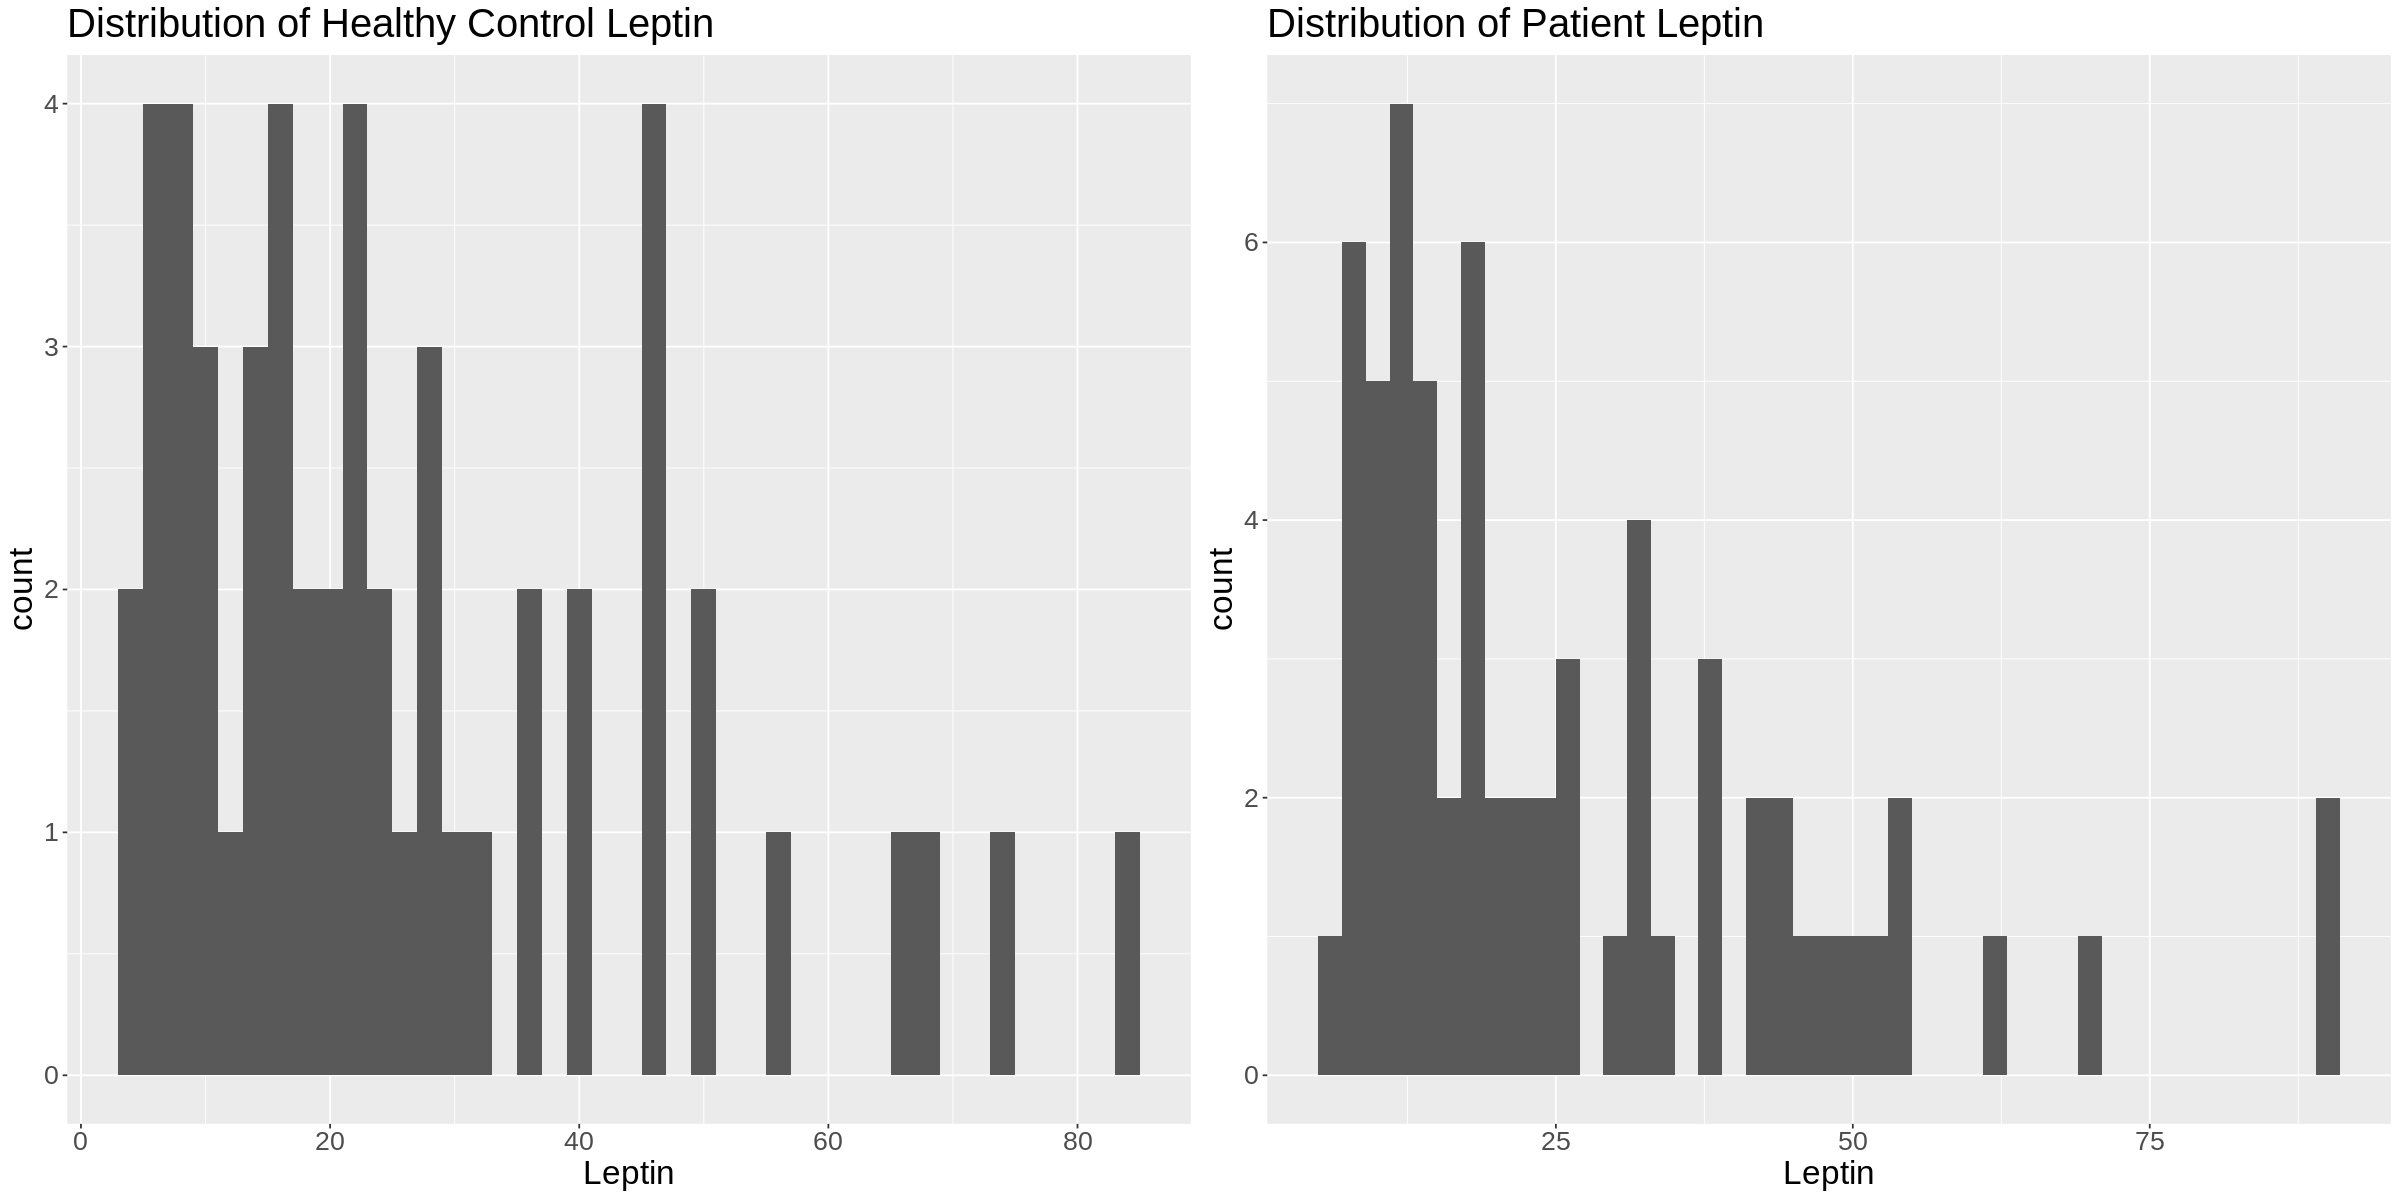

In [18]:
control_vs_patient_plots("Leptin")

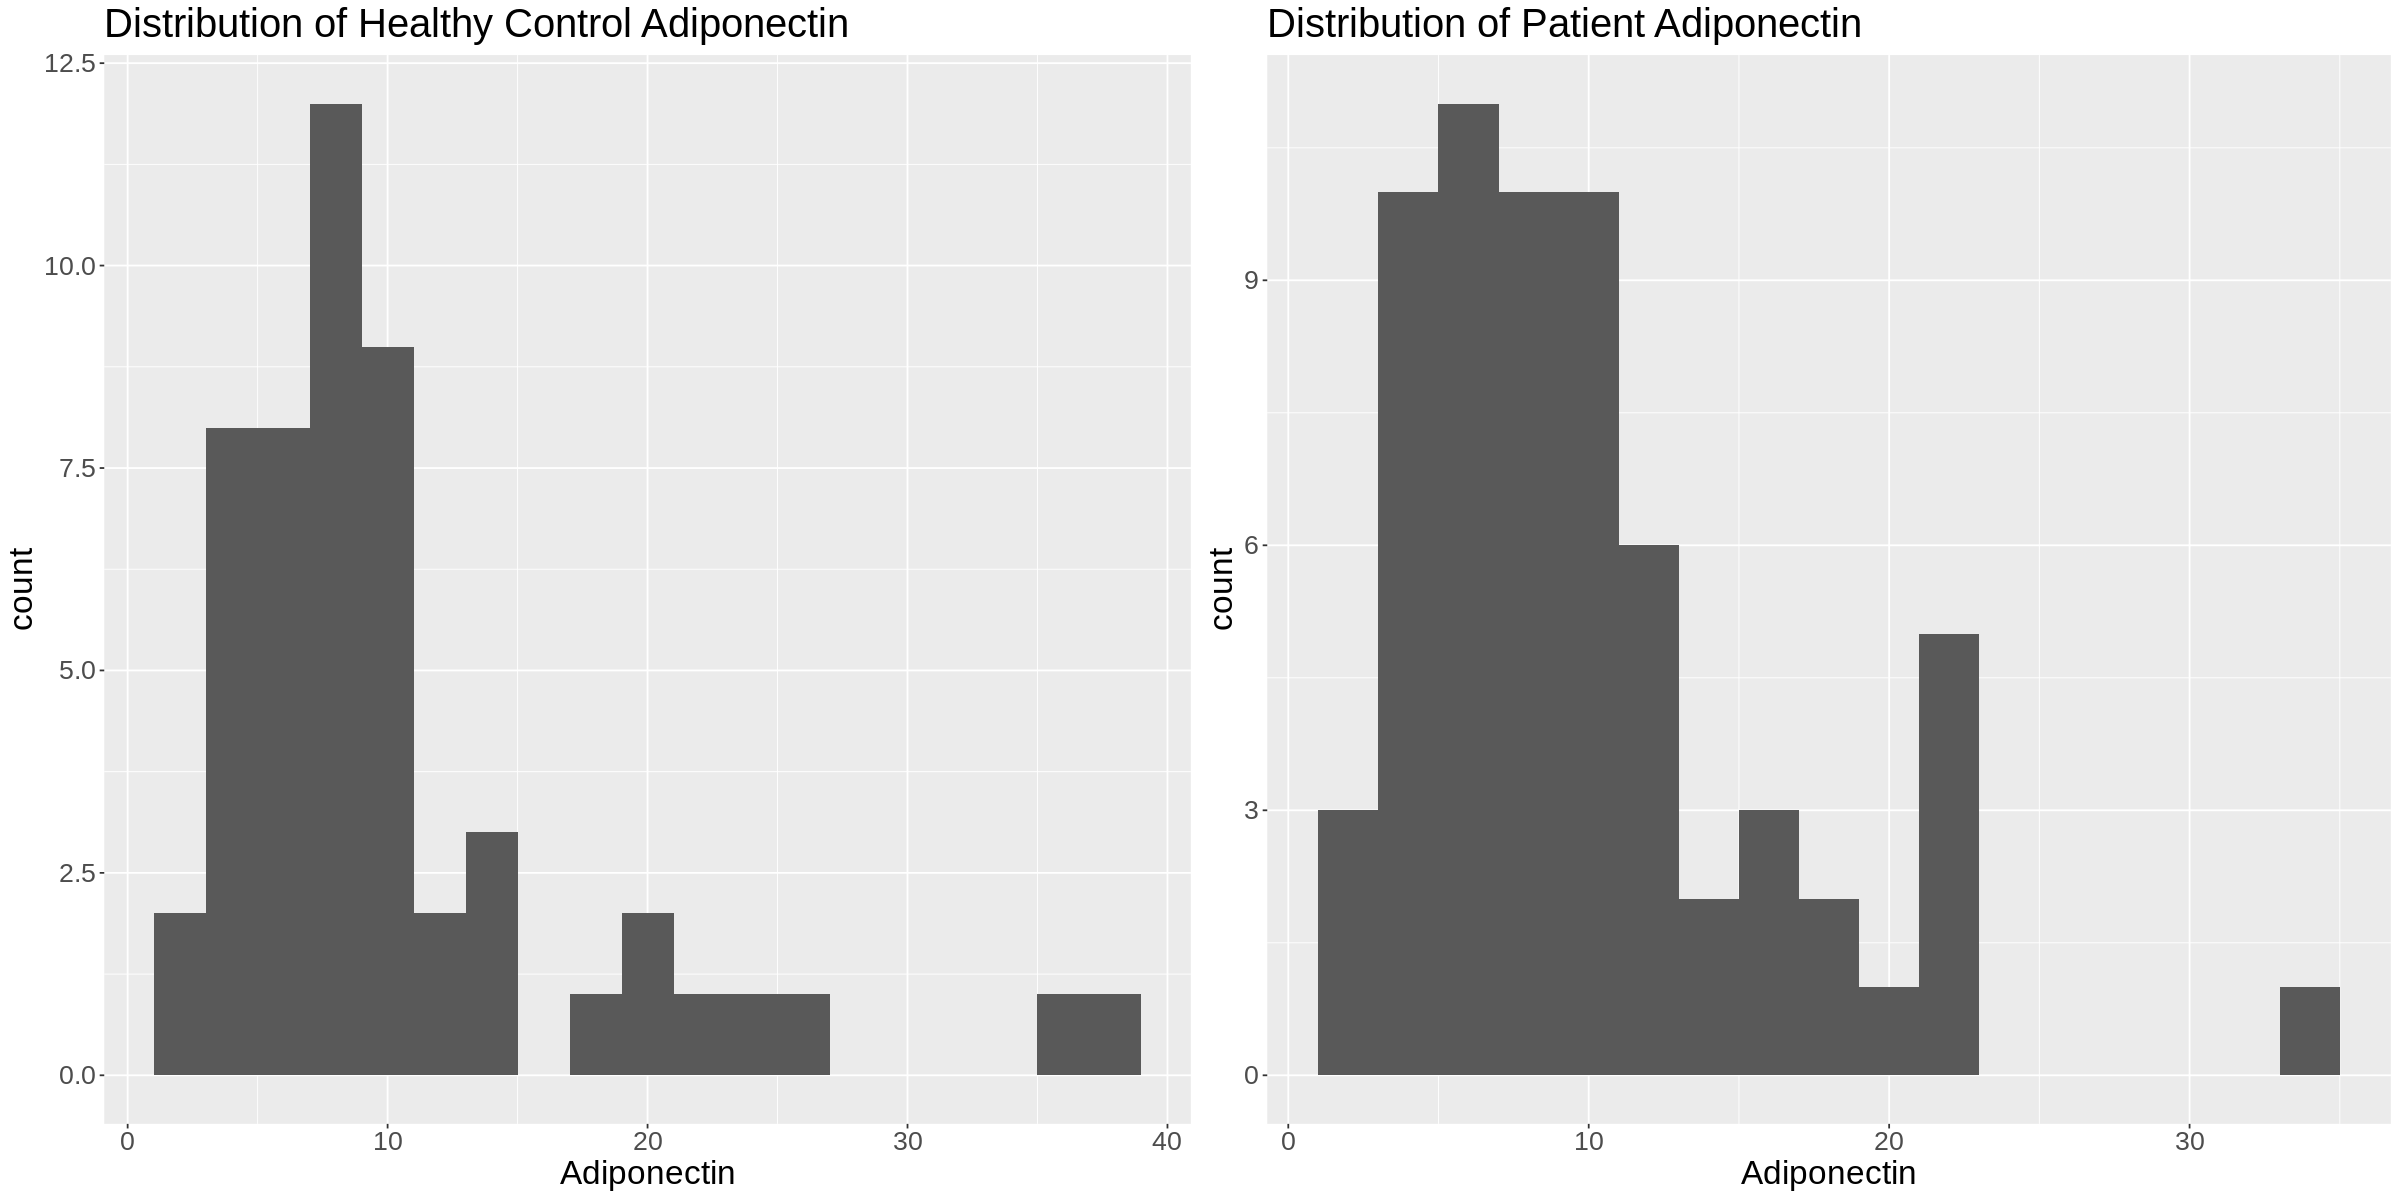

In [19]:
control_vs_patient_plots("Adiponectin")

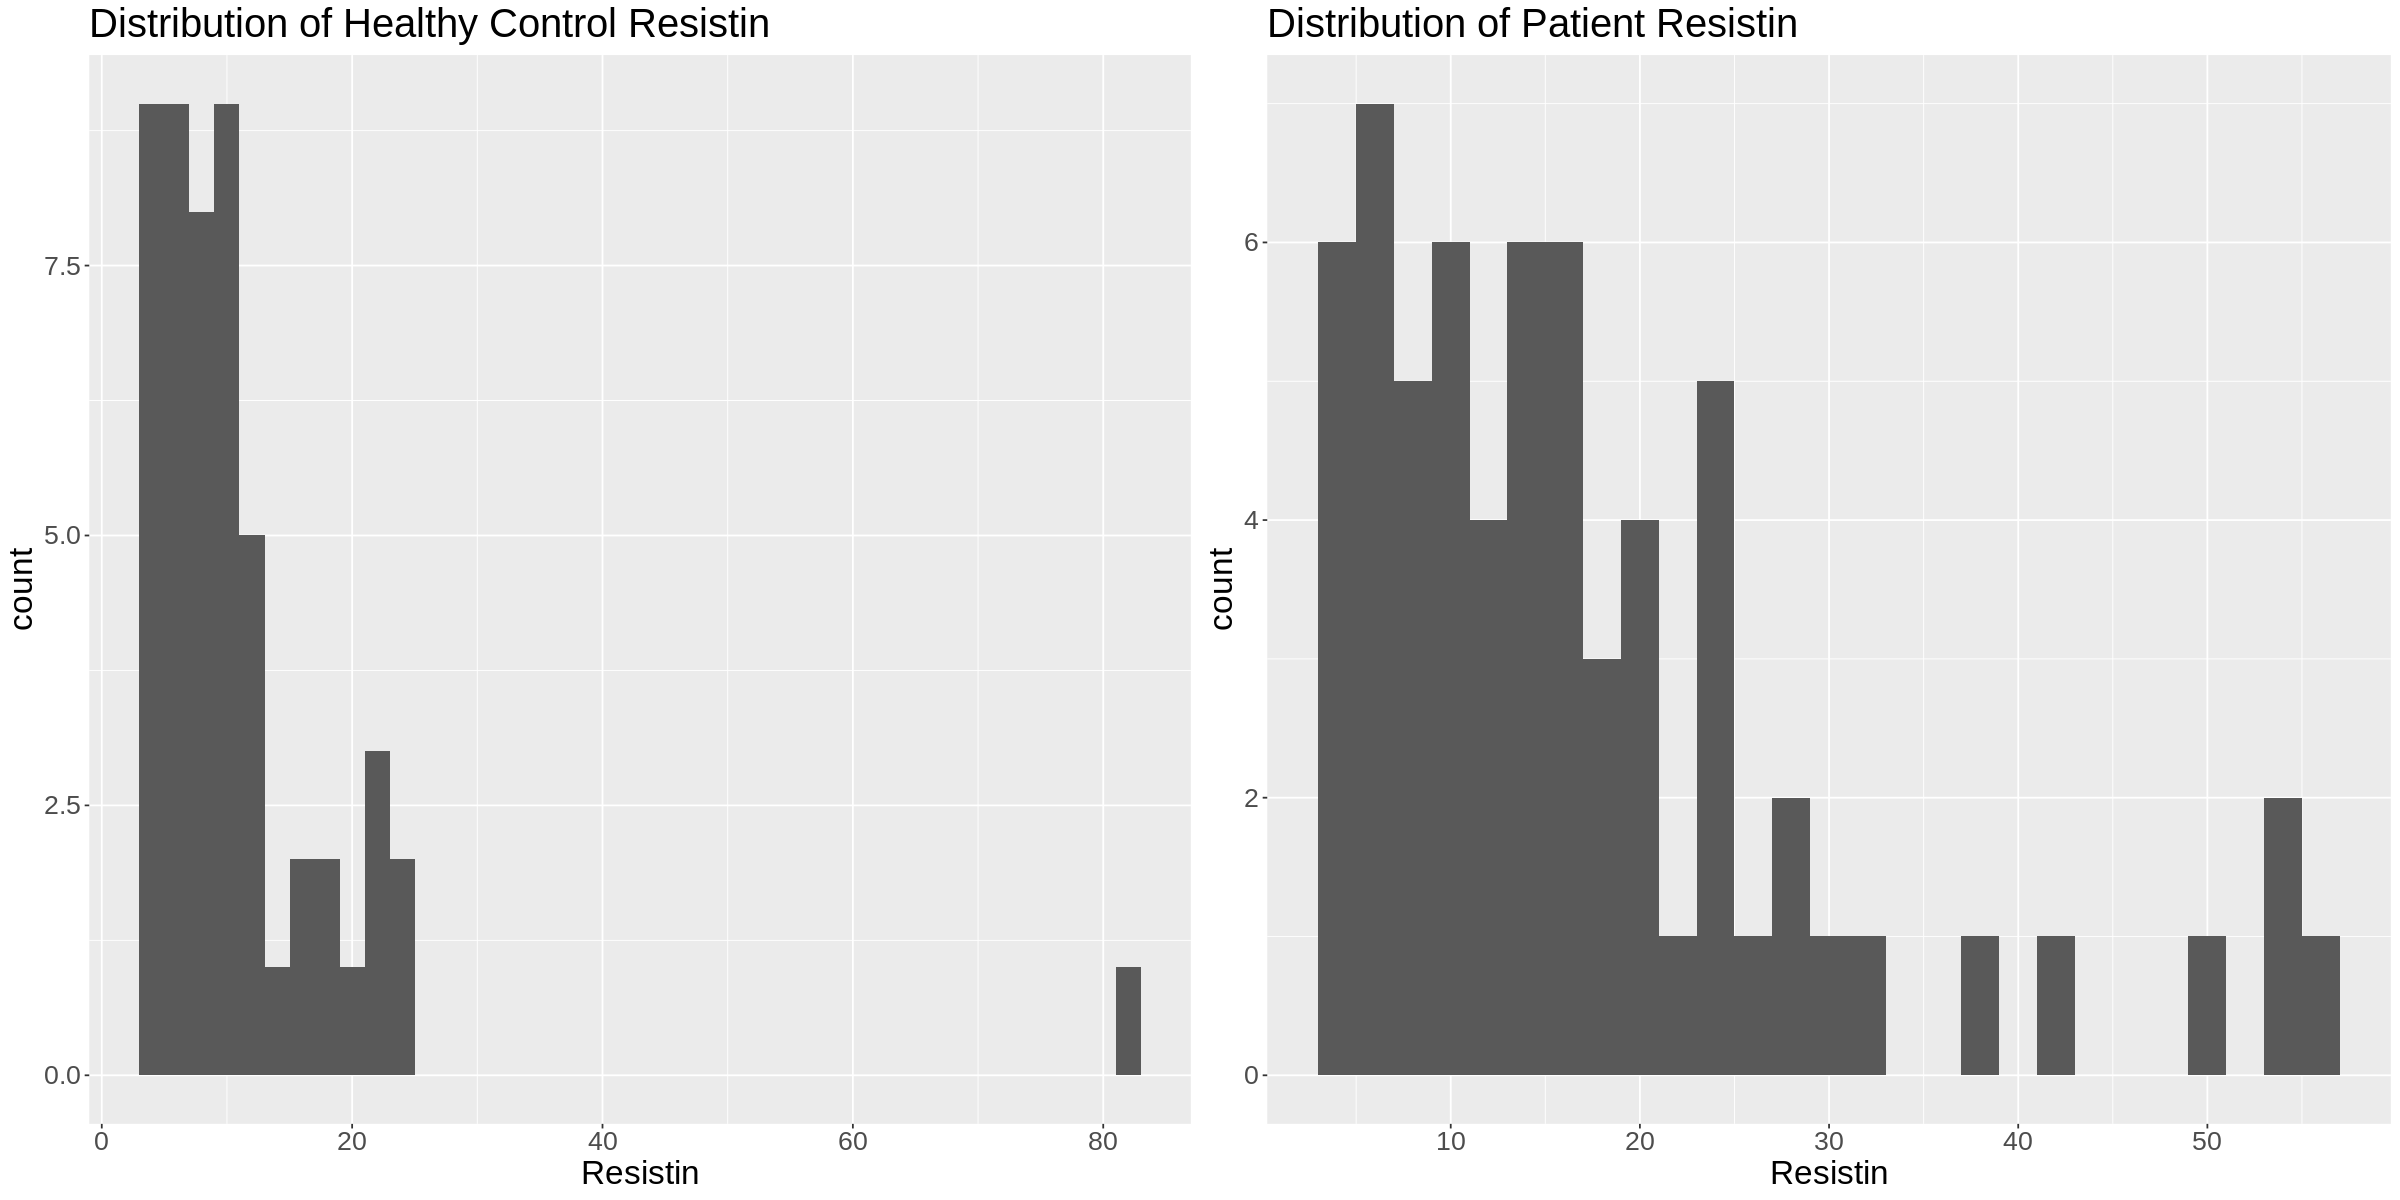

In [20]:
control_vs_patient_plots("Resistin")

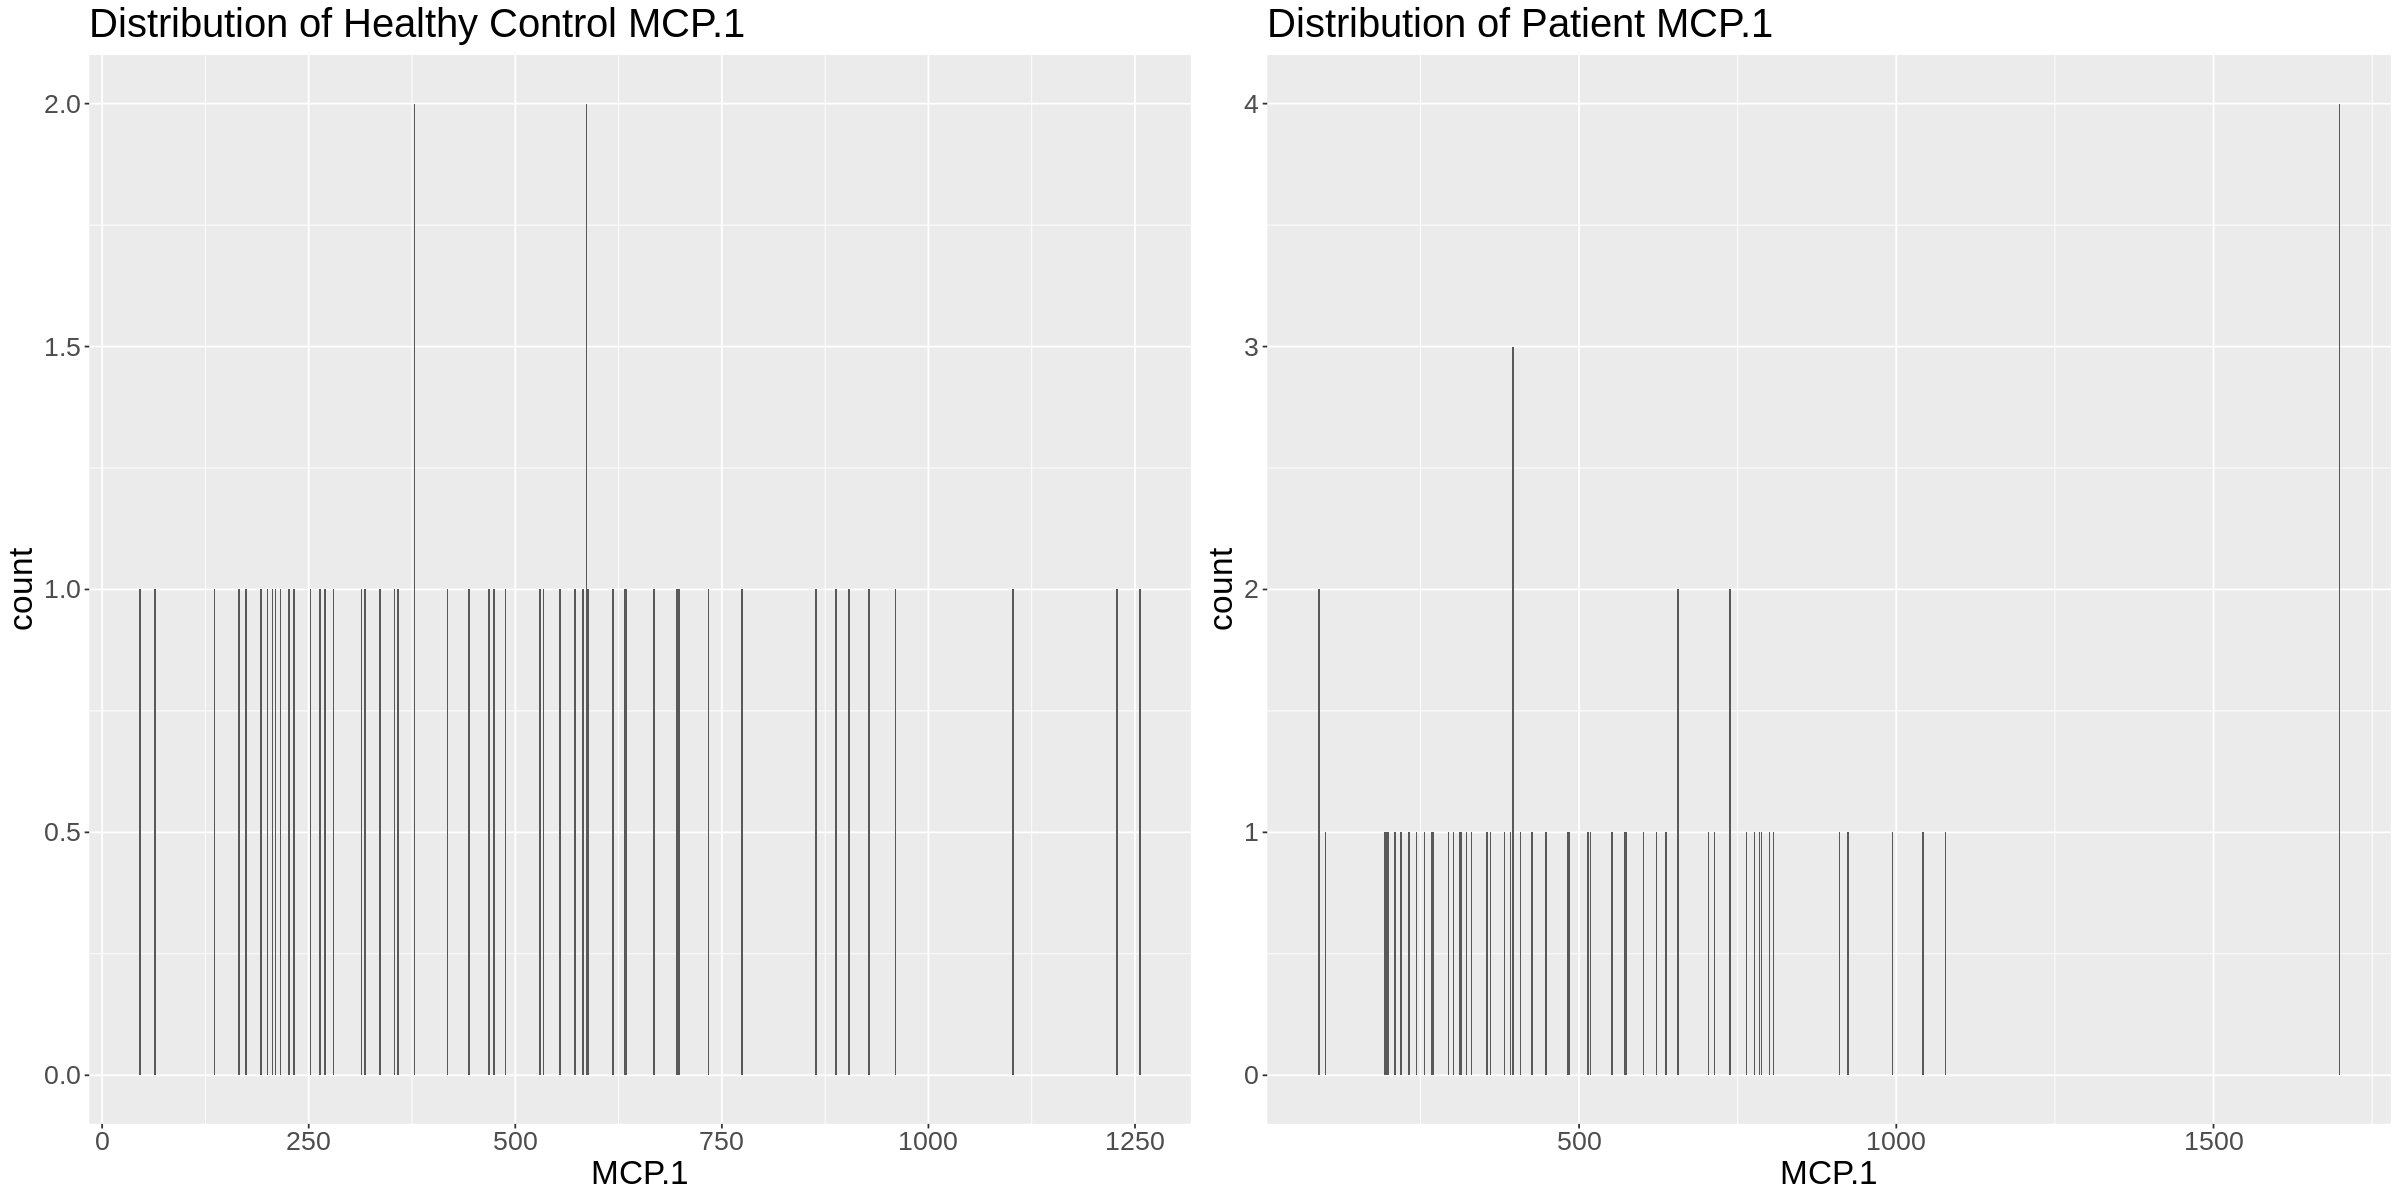

In [21]:
control_vs_patient_plots("MCP.1")